In [ ]:
# import torch
# torch.cuda.empty_cache()  # Clears unreferenced memory (recommended first step)


In [ ]:
# #import gc
# import torch
# import gc
# gc.collect()  # Frees Python-level memory
# torch.cuda.empty_cache()  # Frees GPU memory


In [30]:
import torch  
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Check if CUDA is available, otherwise use CPU
print("Using device:", device)

# Open and read the file "wizard_of_oz.txt"
with open("wizard_of_oz.txt", "r", encoding="utf-8") as f:  
    raw_text = f.read()  # Read the entire content of the file into memory

print("Total number of characters:", len(raw_text))  # Print the total length of the text  
print(raw_text[:100])  # Print the first 100 characters as a preview

# Move text to device (NOTE: Python strings are not tensors, so we don't need .to(device) here)


Using device: cuda
Total number of characters: 245213
﻿

CHAPTER 1.

THE EARTHQUAKE


The train from 'Frisco was very late. It should have arrived at Hugs


# pre-processing and tokenization

In [31]:
import re

# Replace newline characters and special Unicode characters
result2 = raw_text.replace("\n", " ").replace('\ufeff ', "")

# Remove chapter headings in the format "CHAPTER <number>."
preprocessed = re.sub(r'CHAPTER\s\d+\.', '', result2)

# Split text into tokens using punctuation marks, spaces, or special patterns
preprocessed = re.split(r'([,:.;?_!"()\']|--|\s)', preprocessed)

# Remove empty strings and extra spaces from the list
preprocessed = [item.strip() for item in preprocessed if item.strip()]

# Print the total number of tokens after preprocessing
print("Total number of tokens:", len(preprocessed))
print(preprocessed)

# Strings are not tensors, so `.to(device)` is **not applicable** here.
# We will apply `.to(device)` when converting to PyTorch tensors later.


Total number of tokens: 54686
['THE', 'EARTHQUAKE', 'The', 'train', 'from', "'", 'Frisco', 'was', 'very', 'late', '.', 'It', 'should', 'have', 'arrived', 'at', 'Hugson', "'", 's', 'siding', 'at', 'midnight', ',', 'but', 'it', 'was', 'already', 'five', 'o', "'", 'clock', 'and', 'the', 'gray', 'dawn', 'was', 'breaking', 'in', 'the', 'east', 'when', 'the', 'little', 'train', 'slowly', 'rumbled', 'up', 'to', 'the', 'open', 'shed', 'that', 'served', 'for', 'the', 'station-house', '.', 'As', 'it', 'came', 'to', 'a', 'stop', 'the', 'conductor', 'called', 'out', 'in', 'a', 'loud', 'voice', ':', '"', 'Hugson', "'", 's', 'Siding', '!', '"', 'At', 'once', 'a', 'little', 'girl', 'rose', 'from', 'her', 'seat', 'and', 'walked', 'to', 'the', 'door', 'of', 'the', 'car', ',', 'carrying', 'a', 'wicker', 'suit-case', 'in', 'one', 'hand', 'and', 'a', 'round', 'bird-cage', 'covered', 'up', 'with', 'newspapers', 'in', 'the', 'other', ',', 'while', 'a', 'parasol', 'was', 'tucked', 'under', 'her', 'arm', '.',

In [32]:
text = "Hello , this world--is cruel . Isn't it ?"
result = re.split(r'([,:.;?_!"()\']|--|\s)' , text )
result = [item.strip() for item in result if item.strip()]
result

['Hello',
 ',',
 'this',
 'world',
 '--',
 'is',
 'cruel',
 '.',
 'Isn',
 "'",
 't',
 'it',
 '?']

In [33]:

new_preprocessed = []

new_preprocessed.append(" ")

for item in preprocessed:
    if item not in new_preprocessed:
        new_preprocessed.append(item)
    
len(new_preprocessed)
preprocessed = new_preprocessed
len(preprocessed)

5065

In [34]:
# we need to setup the vocabulary , i.e set the preprocessed data into alphabetical manner
#then each token is mapped with a unique value called as token mapping, The->2 , 

all_words = sorted(set(preprocessed))

# add 2 special tokens  as we discussed after 

all_words.extend(["<|endoftext|>" , "<|unk|>"])

vocab_size = len(all_words)
vocab_size # we since we already removed the duplicated words before our vocab size is now sorted too....as_integer_ratio

all_words


[' ',
 '!',
 '"',
 '$1',
 '$5',
 '&',
 "'",
 '(',
 ')',
 '***',
 ',',
 '-',
 '--',
 '.',
 '000',
 '1',
 '14',
 '1500',
 '2',
 '20%',
 '2001',
 '3',
 '30',
 '4',
 '5',
 '50',
 '501',
 '596-1887',
 '6',
 '60',
 '64-6221541',
 '7',
 '8',
 '801',
 '809',
 '84116',
 '9',
 '90',
 ':',
 ';',
 '?',
 'A',
 'ACTUAL',
 'AGAIN',
 'AGREE',
 'AGREEMENT',
 'AIR',
 'ALL',
 'AND',
 'ANOTHER',
 'ANY',
 'ANYTHING',
 'ARE',
 'ARRIVAL',
 'ASCII”',
 'About',
 'Accuser',
 'Additional',
 'Adjustable',
 'After',
 'Afterward',
 'Ah',
 'Ahem',
 'All',
 'Alluring',
 'Almost',
 'Also',
 'Am',
 'Ambroise',
 'America',
 'American',
 'An',
 'And',
 'Angeles',
 'Animals',
 'Another',
 'Any',
 'Anyhow',
 'Anyone',
 'Arabian',
 'Archive',
 'Are',
 'Armies',
 'Army',
 'Around',
 'As',
 'Assorted',
 'At',
 'Athletic',
 'Athletics',
 'Atlantis',
 'Aunt',
 'Australia',
 'Away',
 'Awful',
 'B',
 'BE',
 'BEARS',
 'BEFORE',
 'BEING',
 'BELT',
 'BLACK',
 'BOY',
 'BRAIDED',
 'BREACH',
 'BUGGY',
 'BUT',
 'Bah',
 'Bailum',
 'Band'

# Encoding

In [35]:
#assigning the value to token ... its also called as encoding

vocab = {token : integer for integer , token in enumerate(all_words)}
# we said token : intger means vocab will have a object , these object are token and are intger
# now enumerate give a word and associated number with it , so we set token with its number

vocab

{' ': 0,
 '!': 1,
 '"': 2,
 '$1': 3,
 '$5': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 '***': 9,
 ',': 10,
 '-': 11,
 '--': 12,
 '.': 13,
 '000': 14,
 '1': 15,
 '14': 16,
 '1500': 17,
 '2': 18,
 '20%': 19,
 '2001': 20,
 '3': 21,
 '30': 22,
 '4': 23,
 '5': 24,
 '50': 25,
 '501': 26,
 '596-1887': 27,
 '6': 28,
 '60': 29,
 '64-6221541': 30,
 '7': 31,
 '8': 32,
 '801': 33,
 '809': 34,
 '84116': 35,
 '9': 36,
 '90': 37,
 ':': 38,
 ';': 39,
 '?': 40,
 'A': 41,
 'ACTUAL': 42,
 'AGAIN': 43,
 'AGREE': 44,
 'AGREEMENT': 45,
 'AIR': 46,
 'ALL': 47,
 'AND': 48,
 'ANOTHER': 49,
 'ANY': 50,
 'ANYTHING': 51,
 'ARE': 52,
 'ARRIVAL': 53,
 'ASCII”': 54,
 'About': 55,
 'Accuser': 56,
 'Additional': 57,
 'Adjustable': 58,
 'After': 59,
 'Afterward': 60,
 'Ah': 61,
 'Ahem': 62,
 'All': 63,
 'Alluring': 64,
 'Almost': 65,
 'Also': 66,
 'Am': 67,
 'Ambroise': 68,
 'America': 69,
 'American': 70,
 'An': 71,
 'And': 72,
 'Angeles': 73,
 'Animals': 74,
 'Another': 75,
 'Any': 76,
 'Anyhow': 77,
 'Anyone': 78,
 'Ar

In [36]:
for i ,item in enumerate(list(vocab.items())[-5:]):
    print(item)
len(vocab)

('“the', 5062)
('”', 5063)
('•', 5064)
('<|endoftext|>', 5065)
('<|unk|>', 5066)


5067

In [37]:
class SimpleTokenizerV1:
    
    def __init__(self , vocab):
        self.str_to_int = vocab
        self.int_to_string = {i:s for s,i in vocab.items()}
        # s = token , i = token .....
        # it means for tokenID i , we have its corresponding token s....
        # s,i is basically key,value pair we get from each vocab items...and put these
        #key value pair in the in_to_string part
        
    def encode(self,text):
        # result2 = raw_text.replace("\n" ," ").replace('\ufeff ', "")
        # preprocessed = re.sub(r'CHAPTER\s\d+\.', '', result2)
        preprocessed  = re.split(r'([,:.;?_!"()\']|--|\s)' , text )
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        
        #assigning token id to each tokens
        ids = [self.str_to_int[s] for s in preprocessed]
        
        return ids
    
    def decode(self,ids):
        text = " ".join([self.int_to_string[i] for i in ids])
        # first we convert tokenID into tokens and then join them together
        
        #Replcae spaces before the specefied punctuations
        
        text = re.sub(r'\s+([,.?!"()\'])' ,r'\1',text)
        # here we are geting rid of " " before punctuation mark like " The fox chased ." -> "The fox chased."
        
        return text


In [38]:
tokenizer = SimpleTokenizerV1(vocab)

text = """ "It occurs to me," said the Wizard, "that we ought to get out of this place before the mother dragon comes back." """
  
ids = tokenizer.encode(text)
print(ids)
# means our text is being successfult being encoded into the token id's related to vocab....
# and decode these ids into words to check how better they are performing....
decoded = tokenizer.decode(ids)
print(decoded)

[2, 381, 3260, 4603, 3045, 10, 2, 3918, 4534, 765, 10, 2, 4533, 4885, 3319, 4603, 2372, 3322, 3264, 4551, 3464, 1120, 4534, 3124, 1899, 1479, 1055, 13, 2]
" It occurs to me," said the Wizard," that we ought to get out of this place before the mother dragon comes back."


# there could be a word which wouldnt be available in vocab , so it will cause error since it wont have its corresponding tokenID , bcz that word isnt in vocab when the user does a query with that word

In [39]:
# tokenizer = SimpleTokenizerV1(vocab)

# text = """ Humpty dumpty sat on the wall """
  
# ids = tokenizer.encode(text)


In [40]:
# So how to solve this problem ??

# we can solve this using special context tokens.....which have the provision to handle the token not available in vocab

# so we will add 2 more tokens in it i.e |unk| and |end of text| .

# so the unkown token will recieve UNK tokenID .

# But when to use  |end of text| tokenID ??

# lets say there are 5 textfile and each file has their own text , Text1..Text2.
# so it will be hard to identify that where is the start of which text file.....
# so to solve this problem we use  |end of text| token......to represent that the Text1 of file 1 has been ended , 
# now Text2 of next file will be cont. and so open

#  |end of text| token act as markers basically




In [41]:
class SimpleTokenizerV2:
    
    def __init__(self , vocab):
        self.str_to_int = vocab
        self.int_to_string = {i:s for s,i in vocab.items()}
        # s = token , i = token .....
        # it means for tokenID i , we have its corresponding token s....
        # s,i is basically key,value pair we get from each vocab items...and put these
        #key value pair in the in_to_string part
        # the vocab was in token:tokenID , we did int_to_str in tokenID:token for decoding to be easy
        
        #str to int contain token:tokenID , get ID from token used to encode
        #int to str contains tokenID : token , get token from ID used to decode list of ID into token
        # both helps in encoding and decoding respectively
        
    def encode(self,text):
        # result2 = raw_text.replace("\n" ," ").replace('\ufeff ', "")
        # preprocessed = re.sub(r'CHAPTER\s\d+\.', '', result2)
        preprocessed  = re.split(r'([,:.;?_!"()\']|--|\s)' , text )
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed= [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]
        #assigning token id to each tokens
        ids = [self.str_to_int[s] for s in preprocessed]
        
        return ids
    
    def decode(self,ids):
        text = " ".join([self.int_to_string[i] for i in ids])
        # first we convert tokenID into tokens and then join them together
        # ["the" ,"elephant","was","big"] - > the elephant was big , i,e inserted " " space in between tokens 
        
        #Replcae spaces before the specefied punctuations
        text = re.sub(r'\s+([,.?!"()\'])' ,r'\1',text)
        # here we are geting rid of " " before punctuation mark like " The fox chased ." -> "The fox chased."
        
        return text


In [42]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = """ Humpty dumpty sat on the wall """
text2="""Humpty dumpty had a great fall"""

text = " <|endoftext|>. ".join((text1,text2))
# join text1 and text2 with " <|endoftext|>. "

print(text )

ids = tokenizer.encode(text)
print(ids)

decoded = tokenizer.decode(ids)
print(decoded)

# the encoder and decoder uses  <|endoftext|> 's tokenID to make it tokenized  

 Humpty dumpty sat on the wall  <|endoftext|>. Humpty dumpty had a great fall
[5066, 5066, 3930, 3280, 4534, 4853, 5065, 13, 5066, 5066, 2496, 790, 2445, 2137]
<|unk|> <|unk|> sat on the wall <|endoftext|>. <|unk|> <|unk|> had a great fall


# there are also other type of SPECIAL TOKENS like :

1) [BOS] --> begining of sequence

2) [PD] -> padding

3) [EOS] - > end of sequence 

and etc


the GPT model doesnt uses UNK token , rather it uses BYTE PAIR ENCODING that deal with unkown tokens.....

# BYTE PAIR ENCODING (BPE)

used to train large LLM model like GPT2,3

it is a subword based tokenizer

types of tokenizer ->
1) a word based tokenizer ["i","am","playing","cricket"]
2) subword based ["i","am","play","ing","cricket"]
3) character based ["i","a","m"...]



In [43]:
import tiktoken
SimpleTokenizerV3 = tiktoken.get_encoding("gpt2")



In [44]:
text = (
    "Humpty dumpty sat on the wall <|endoftext|> , humpty dumpty had a great fall"
    " who pushed them from the wall"
)

integers = SimpleTokenizerV3.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[32661, 5835, 288, 388, 5835, 3332, 319, 262, 3355, 220, 50256, 837, 1311, 5835, 288, 388, 5835, 550, 257, 1049, 2121, 508, 7121, 606, 422, 262, 3355]


In [45]:
print(SimpleTokenizerV3.decode(integers))

Humpty dumpty sat on the wall <|endoftext|> , humpty dumpty had a great fall who pushed them from the wall


# Creating input target pairs

in this section we implement a data loader that fetches the input target pairs using a sliding window approach.

to get started , we will first tokenzie the whole story we worked withh earlier using the BPE tokenizer

In [46]:
enc_text = SimpleTokenizerV3.encode(raw_text)
len(enc_text)

63036

In [47]:
enc_sample = enc_text[50:]
enc_sample

[15750,
 290,
 262,
 12768,
 17577,
 198,
 9776,
 7163,
 287,
 262,
 7627,
 618,
 262,
 1310,
 4512,
 6364,
 374,
 11137,
 510,
 284,
 262,
 198,
 9654,
 14999,
 326,
 4983,
 329,
 262,
 4429,
 12,
 4803,
 13,
 1081,
 340,
 1625,
 284,
 257,
 2245,
 262,
 198,
 17561,
 33029,
 1444,
 503,
 287,
 257,
 7812,
 3809,
 25,
 198,
 198,
 1,
 48098,
 1559,
 338,
 311,
 2530,
 2474,
 198,
 198,
 2953,
 1752,
 257,
 1310,
 2576,
 8278,
 422,
 607,
 5852,
 290,
 6807,
 284,
 262,
 3420,
 286,
 262,
 198,
 7718,
 11,
 6872,
 257,
 266,
 15799,
 6050,
 12,
 7442,
 287,
 530,
 1021,
 290,
 257,
 2835,
 6512,
 12,
 66,
 496,
 198,
 32111,
 510,
 351,
 14741,
 287,
 262,
 584,
 11,
 981,
 257,
 17850,
 349,
 373,
 29779,
 198,
 4625,
 607,
 3211,
 13,
 383,
 39206,
 4193,
 607,
 572,
 262,
 1097,
 290,
 788,
 262,
 198,
 18392,
 263,
 2067,
 465,
 4512,
 757,
 11,
 523,
 326,
 340,
 279,
 18339,
 290,
 7128,
 22739,
 290,
 198,
 76,
 2668,
 6364,
 1497,
 510,
 262,
 2610,
 13,
 383,
 1738,
 339,
 373

https://youtu.be/iQZFH8dr2yI?si=nwCd7FX39-K7Gxqs 1:15:00 to learn how it is being done

so how and what are input pair target ?

its used to predict the next output word from previous ones.....

(next_predicted_word)

Hello (my)

Hello my (name)

Hello my name (is)

Hello my name is (karen)

Hello my name is karen

But how is it done ??

so we have 2 arrays X and Y , X contains the input tokenID , while Y contains the predicted nxt output word ID or targert token 's ID

ex -> X : [1,2,3,4]  Y:[2,3,4,5]

1st iteration -> we typed token of index 1 , the input was 1 , the predicted output from 1 was 2....

2nd iteration -> we typed token of index 2 ,  the input was 1 2 , the predicted output from 1 2 was 3....

3nd iteration -> we typed token of index 3 ,  the input was 1 2 3 , the predicted output from 1 2 3 was 4....

4th iteration -> we typed token of index 4 ,  the input was 1 2 3 4, the predicted output from 1 2 3 4 was 5....

the size of the X and Y array is called context size , the number of iteratioin of predicted outpt word depends upon context_size


In [48]:
context_size = 4

x=enc_sample[:context_size]
y=enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:        {y}")

x: [15750, 290, 262, 12768]
y:        [290, 262, 12768, 17577]


In [49]:
for i in range(1,context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    
    print(context,"--->",desired)
    # the desired tokenID represent the desired output we want 

[15750] ---> 290
[15750, 290] ---> 262
[15750, 290, 262] ---> 12768
[15750, 290, 262, 12768] ---> 17577


In [50]:
for i in range(1,context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    
    print(SimpleTokenizerV3.decode(context),"--->",SimpleTokenizerV3.decode([desired]))

clock --->  and
clock and --->  the
clock and the --->  gray
clock and the gray --->  dawn


In [51]:
# we have now created the input-target pairs that we can into use for LLM training in upcoming code

#there is only one more task before we can turn the token into embeddings : impelementing an efficient dataloader that iterators over the input  dataset ,
# and returs the inputs and targets as pytorch tensors , which can be thought of as multidimensional arrays

# in particular  we are intrested in creating 2 tensors , an input tensor containing the text that LLM sees and a target tensor that includes the target for LLM to predict

# to do this we will use datasets and dataloader 


but what should be context_size ?? 
we can make the context_size to be 10000 or more  , but we can use tensor for it,

so X = [[1,2,3,4],
        [5,6,7,8],
        [9,10,11,12],
        .
        .
        .]

y = [[2,3,4,5],
     [6,7,8,9],
     [10,11,12,13],
     .
     .
     .]

so we can a context size of 4 and with muliple stacked tensor which can predict the future word....

we will be using dataloader to create the X and Y datatset and then will be using the sliding window , slide the window by 1 

Step 1 : tokenize the entire text

Step 2 : use a sliding window to chunk the book into the overlapping sequence of max_lenght

step 3: return the total number of rows in the dataset

step 4: return a single row from the dataset


In [52]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride,):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            
            self.input_ids.append(torch.tensor(input_chunk).to(device))
            self.target_ids.append(torch.tensor(target_chunk).to(device))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]



# the following code will use the GPTDatasetV1 to load the input cia a pytorch Dataloader

step 1: initalize the tokenizer

step 2: create the Dataset

step 3 : drop_last = True drops the last batch if it is shorter than the specefied batch_size to prevent loss spikes during training

step 4: the number of CPU preocesses to use for preocessing

In [53]:
def create_dataloader_V1(txt, batch_size=4, max_length=256, 
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):



    # batch_soze=4 means the model will change its parameters or weights after 4 batches
    # stride is basically how much input-target pairs we need to skip to make another one inplace of original when original is exhausted
        
    #step 1 :
    
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

#dataloader will basically acess the __getitem__ to create the input output tensor

In [54]:
#conver the dataloader into python iterator to fetch the next entry via python's built iin next() function
# https://youtu.be/iQZFH8dr2yI?si=Hgq9t4iHvAIgCybk  35:00  and 46:00 for more clearity 

In [55]:
import torch

dataloader = create_dataloader_V1(
    raw_text , batch_size=1 , max_length=4 , stride=1 , shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[171, 119, 123, 198]], device='cuda:0'), tensor([[119, 123, 198, 198]], device='cuda:0')]


In [56]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[119, 123, 198, 198]], device='cuda:0'), tensor([[  123,   198,   198, 41481]], device='cuda:0')]


# Create token embedding

In [57]:
input_ids = torch.tensor([2,3,5,1])

for the sake of simplicity , we will be using vocabulary of 6 words instead of 50K words in BPE tokenizer
and we want to create embedding of size 3 

for each word(token) associated with the input ids will have a dense vector of dimension 3 ( which will decide its semantic relationship)



In [58]:
vocab_size = 6 

output_dim = 3 
# each vector (token) will be converted into vector of 3 dimenison

torch.manual_seed(42)

embedding_layer=  nn.Embedding(vocab_size , output_dim)

In [59]:
# quick fox is in the house
#    0   1   2  3  4   5     = 6 words 

In [60]:
print(embedding_layer) , print(embedding_layer.weight)
# currently weights are random  , we will train the model to produce much better weights 

Embedding(6, 3)
Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


(None, None)

In [61]:
embedding_layer(torch.tensor([4]))

tensor([[-0.2316,  0.0418, -0.2516]], grad_fn=<EmbeddingBackward0>)

In [62]:
embedding_layer(input_ids).to(device)


tensor([[ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [ 0.8599, -0.3097, -0.3957],
        [ 0.4396, -0.7581,  1.0783]], device='cuda:0',
       grad_fn=<ToCopyBackward0>)

In [63]:
## nn.Embedding is better than nn.Linear bcz Embdedding is efficient and linear layer does so many 0 multiplcation 
# output of both are same but embedding is more fast than linear in terms of embedding.....since linear does so many X.W'

# #Positional Encoding

 

In [64]:
import torch.nn as nn
vocab_size = 50257
output_dim = 256

token_embedding_layer = nn.Embedding(vocab_size , output_dim).to(device)

In [65]:
# so the dataloader size will be 8 ,i.e weight will be chamged after 8 dataset are passed
#the constext size is 4 , i.e 4 tokenID will be passed at a time 
# and each token ID will be of 256 dimensional vector

# Batch 1: [102, 3401, 27, 9872]
# Batch 2: [4500, 212, 10987, 307]
# Batch 3: [101, 2304, 4092, 52]
# Batch 4: [8392, 76, 491, 2048]
# Batch 5: [7823, 15, 200, 3498]
# Batch 6: [3002, 555, 4007, 879]
# Batch 7: [1087, 2334, 22, 9012]
# Batch 8: [702, 8943, 210, 1400]

# tokenID 102 = [1,2,.....256]

In [66]:
max_length = 4

dataloader = create_dataloader_V1(
    raw_text,
    batch_size=8,
    max_length=max_length,
    stride=max_length,
    shuffle=False
)
  
data_iter = iter(dataloader)

first_inputs , first_target= next(data_iter)

In [67]:
print(f"tokenID : \n {first_inputs} \n \n Inputs shape : {first_inputs.shape}" )

tokenID : 
 tensor([[  171,   119,   123,   198],
        [  198, 41481,   352,    13],
        [  198,   198, 10970, 31834],
        [ 4221, 10917,    32,  7336],
        [  628,   198,   464,  4512],
        [  422,   705,    37,  2442],
        [ 1073,   373,   845,  2739],
        [   13,   632,   815,   423]], device='cuda:0') 
 
 Inputs shape : torch.Size([8, 4])


In [68]:
print(f"tokenID : \n {first_target} \n \n Inputs shape : {first_target.shape}" )

tokenID : 
 tensor([[  119,   123,   198,   198],
        [41481,   352,    13,   198],
        [  198, 10970, 31834,  4221],
        [10917,    32,  7336,   628],
        [  198,   464,  4512,   422],
        [  705,    37,  2442,  1073],
        [  373,   845,  2739,    13],
        [  632,   815,   423,  5284]], device='cuda:0') 
 
 Inputs shape : torch.Size([8, 4])


In [69]:
token_embedding = token_embedding_layer(first_inputs).to(device)
# it will create a 256 dimensioal vector for each token
print(token_embedding.shape)
print(token_embedding)

# what it doing is .......Embedding works as lookup table , which has ( the parameter we gave ) contaisn...

# 50257 rows with 256 columns each means

# +--------+----------------------------+
# | TokenID |      256-Dimensional Vector |
# +--------+----------------------------+
# |   0     | [ 0.12, -0.34,  0.88, ...] |
# |   1     | [ 0.56, -0.21, -0.43, ...] |
# |  ...    |            ...             |
# |  171    | [ 0.03,  0.77, -0.61, ...] |  <-- This is returned for token ID 171
# |  198    | [ 0.45, -0.12,  0.19, ...] |  <-- For token ID 198
# | 41481   | [-0.21,  0.65, -0.35, ...] |  <-- For token ID 41481
# +--------+----------------------------+

# so for each tokenID , it will pull that corrsponding 256 dimensional vector from the Embedding lookup table

torch.Size([8, 4, 256])
tensor([[[ 0.5072,  1.4120,  1.7683,  ..., -1.5084,  0.2171,  0.2944],
         [ 1.1971, -0.8717,  0.7052,  ..., -0.9979, -0.8441,  0.9654],
         [-1.3467,  0.2454,  0.1800,  ...,  0.1322,  0.0364, -0.6126],
         [ 0.9026,  0.0192,  0.3289,  ..., -0.3135,  1.5535, -0.5619]],

        [[ 0.9026,  0.0192,  0.3289,  ..., -0.3135,  1.5535, -0.5619],
         [ 0.3655, -0.6115, -1.0976,  ...,  0.8969,  0.7868, -1.1165],
         [-1.9689, -0.8309,  0.4688,  ..., -0.1933, -0.8432, -0.2724],
         [-0.7561, -0.6087,  0.0652,  ..., -1.6390, -0.5326, -0.0415]],

        [[ 0.9026,  0.0192,  0.3289,  ..., -0.3135,  1.5535, -0.5619],
         [ 0.9026,  0.0192,  0.3289,  ..., -0.3135,  1.5535, -0.5619],
         [-0.3659,  0.8934,  1.0960,  ..., -1.9237, -1.8893, -0.7709],
         [ 0.5033,  0.7232,  1.6244,  ..., -1.2104,  1.6366, -1.0364]],

        ...,

        [[-0.0897, -1.6456,  0.8128,  ...,  0.0567,  1.9796,  0.1554],
         [ 0.2288, -1.3381,  0.30

In [70]:
context_length = max_length

pos_embedding_layer = nn.Embedding(context_length , output_dim)

In [71]:
pos_embedding =pos_embedding_layer(torch.arange(max_length)).to(device)
print(pos_embedding.shape)

torch.Size([4, 256])


In [72]:
pos_embedding.to(device)
# now these will be added to each vector embedding of the each batch...

# ex-> batch 1 : [1,2,3,4] 
# tokenID 1 : [1...256] 
# tokenID 2 : [256...512] 
# tokenID 3 : [512...1024] 
# tokenID 4 : [1024...1300] 

# and POS embedding for each token is
# [ 0.0097,  0.2016, -1.6626,  ...,  0.5333, -0.7019, -0.9885],
# [-0.2264, -0.9891, -0.8780,  ...,  1.2001,  0.2647,  0.4910],
# [-1.4669,  0.6730,  1.1581,  ..., -0.5983, -1.0508,  1.1282],
# [ 0.9565,  0.8378,  0.2945,  ..., -0.8769,  0.5794, -0.0622]]

# now tokenID 1=  [1...256]  +  [ 0.0097,  0.2016, -1.6626,  ...,  0.5333, -0.7019, -0.9885],
# and so for other.....

# amd it goes for each batches......

tensor([[ 1.2192, -0.2741,  0.6823,  ..., -2.0313, -0.3160, -0.2499],
        [ 0.1600, -2.1962,  0.4126,  ..., -1.1532,  0.4579,  1.3812],
        [-0.1451,  0.5679,  0.1859,  ...,  0.2771, -1.2594,  1.3905],
        [ 1.3473, -0.5042, -0.2962,  ...,  0.7891,  1.0097, -0.0340]],
       device='cuda:0', grad_fn=<ToCopyBackward0>)

In [73]:
print("Token Embedding Device:", token_embedding.device)
print("Positional Embedding Device:", pos_embedding.device)


Token Embedding Device: cuda:0
Positional Embedding Device: cuda:0


In [74]:
input_embeddings = token_embedding + pos_embedding

# but how does python add a 8*4*256 with 4*256 ? 
#so it duplicated 4*256 8 times to match 8*4*256

In [75]:
input_embeddings

tensor([[[ 1.7265,  1.1379,  2.4506,  ..., -3.5397, -0.0988,  0.0445],
         [ 1.3571, -3.0680,  1.1178,  ..., -2.1512, -0.3862,  2.3465],
         [-1.4918,  0.8133,  0.3660,  ...,  0.4093, -1.2230,  0.7779],
         [ 2.2499, -0.4850,  0.0328,  ...,  0.4756,  2.5632, -0.5959]],

        [[ 2.1218, -0.2550,  1.0113,  ..., -2.3449,  1.2375, -0.8118],
         [ 0.5256, -2.8077, -0.6850,  ..., -0.2563,  1.2447,  0.2647],
         [-2.1139, -0.2629,  0.6547,  ...,  0.0838, -2.1026,  1.1181],
         [ 0.5912, -1.1129, -0.2309,  ..., -0.8498,  0.4772, -0.0755]],

        [[ 2.1218, -0.2550,  1.0113,  ..., -2.3449,  1.2375, -0.8118],
         [ 1.0626, -2.1771,  0.7415,  ..., -1.4668,  2.0114,  0.8193],
         [-0.5110,  1.4613,  1.2820,  ..., -1.6466, -3.1487,  0.6196],
         [ 1.8506,  0.2190,  1.3282,  ..., -0.4213,  2.6463, -1.0704]],

        ...,

        [[ 1.1295, -1.9198,  1.4952,  ..., -1.9746,  1.6637, -0.0945],
         [ 0.3888, -3.5344,  0.7213,  ..., -0.0152, -1.31

# Attention mechanism

used to determine the sequence of words along with their semantic meaning and relationhip with other word in the sentence to amke a sentence


the goal is to convert the vector embedding into context vector which are more dense 

In [76]:
# Input Vector ->            Your           Journey          Starts         From           Here
#                             |                |                |              |              |
#                             x1               x2               x3             x4             x5
#                             |                |                |              |              |
# Token Embedding ->   [1.0, 2.0, 3.0]   [2.0, 3.0, 4.0]   [1.5, 2.5, 3.5]   [2.1, 2.2, 2.3]   [3.0, 3.5, 4.0]            
#                             |                |                |              |              |
# Attention Weight ->        *a21            *a22              *a23           *a24           *a25
#                             |________________|________________|______________|______________|
#                                                             |
#                                                             |
#                                                             +      ADD ALL        
# Context Vector of journet ->                             [x,y,z]
#                       
#                    
#

In [77]:
# we will consider an example as " Your journey starts with one step"


<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_16348\2118309242.py:6: SyntaxWarning: invalid escape sequence '\S'
  image_path = "images\Screenshot 2025-03-15 150741.png"


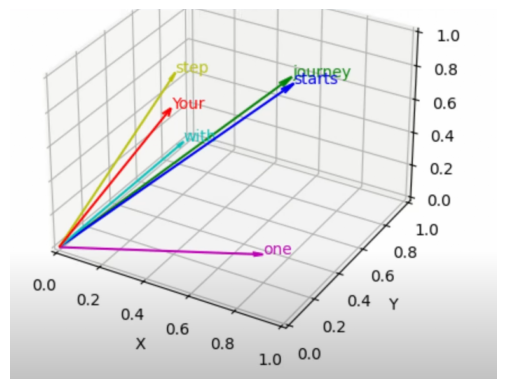

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image

image_path = "images\Screenshot 2025-03-15 150741.png"
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()


# Path to your image



so how is it happening ??

so we got a text " Your journey starts with one step " . 
here first we assigned a random vecotr to them , now we want to find which 2 vectors are SIMILIAR to each other , like in terms of direction , which can be done using DOT PRODUCT , 
since A.B = |A||B| sin@ , A.B is max when the angle between A and B is less......that means they are in same direction.....

if 2 vectors are in same direction means they are higly related to each other , which can help us in using ATTENTION MECHANISM......

now using the dot product we will find the attention scores , which is basically their dot product

since cos0 =1 , cos90 =0


In [79]:
import torch
#input = " Your journey starts with one step "
# tokenID = [1,2,3,4,5,6]

# vector embedding of each =  
#     [1.0, 2.0, 3.0],
#     [4.0, 5.0, 6.0],
#     [7.0, 8.0, 9.0],
#     [10.0, 11.0, 12.0],
#     [13.0, 14.0, 15.0],
#     [16.0, 17.0, 18.0]



inputs = torch.tensor([
        [0.8336, 1.5814, 1.4410],
        [0.7578, 1.4704, 0.9145],
        [1.3418, 0.5231, 1.7488],
        [1.8982, 0.4669, 0.9541],
        [0.8831, 0.3933, 1.3265],
        [1.8179, 0.2747, 0.3655]])

In [80]:
# Select the 2nd token (Journey)
query = inputs[1]  

# Create an empty tensor for attention scores
attn_scores_2 = torch.empty(inputs.shape[0])

# Calculate dot product (similarity) with 'Journey'
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print("Attention Scores:", attn_scores_2)
print("Max Score:", max(attn_scores_2))
# we can see Journey and one has big dot produt value ,that means either their mag is more or they are more SIMILIAR
# but how high mag can make the dot product more for less similiar words , so how to solve this ??

Attention Scores: tensor([4.2748, 3.5726, 3.3853, 2.9975, 2.4606, 2.1158])
Max Score: tensor(4.2748)


In [81]:
#before solving the mag thing we need to normalize the scores ,
# so that the sum of all these socres will be equal to 1 to make a good probability distribution
# like since one and journey has more dot product value their probability will be memoryview
# so P(a)+....P(f)=1

attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print(f"attention wights for journey to other words : {attn_weights_2_tmp}" )

# we can also use softmax function instead of thhis to get more clear picture.....
# 

attention wights for journey to other words : tensor([0.2273, 0.1900, 0.1800, 0.1594, 0.1308, 0.1125])


In [82]:
# the MORE PRECISED attention mechanism  published by gogle in its 2017 paper
# used to solve the MAG overwhelming the DISSIMILARITY of 2 vectors
import torch
import torch.nn.functional as F

# Example embeddings
embeddings = torch.tensor([
    [3., 12., 7.],
    [5., 1., 19.],
    [10., 6., 14.],
    [0., 8., 2.],
    [15., 11., 20.],
    [4., 17., 9.]
])

# Calculate dot product (QK^T)
Q = K = embeddings
dot_product = torch.matmul(Q, K.T)

# Scaling
d_k = embeddings.size(1)  # Dimension size (3 here)
scaled_dot_product = dot_product / torch.sqrt(torch.tensor(d_k))

# Applying softmax for attention scores
attention_scores = F.softmax(scaled_dot_product, dim=-1)

print("Scaled Dot Product:\n", scaled_dot_product)
print("\nAttention Scores:\n", attention_scores)


Scaled Dot Product:
 tensor([[116.6248,  92.3760, 115.4701,  63.5085, 183.0200, 161.0807],
        [ 92.3760, 223.4346, 185.9068,  26.5581, 269.0452, 120.0889],
        [115.4701, 185.9068, 191.6803,  43.8786, 286.3658, 154.7299],
        [ 63.5085,  26.5581,  43.8786,  39.2598,  73.9008,  88.9119],
        [183.0200, 269.0452, 286.3658,  73.9008, 430.7033, 246.5286],
        [161.0807, 120.0889, 154.7299,  88.9119, 246.5286, 222.8572]])

Attention Scores:
 tensor([[1.4618e-29, 4.3034e-40, 4.6070e-30, 0.0000e+00, 1.0000e+00, 2.9640e-10],
        [0.0000e+00, 1.5543e-20, 7.8241e-37, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.3822e-44, 7.5614e-42, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [9.2777e-12, 8.3191e-28, 2.7687e-20, 2.7312e-22, 3.0252e-07, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [7.7710e-38, 0.0000e+00, 1.3562e-40, 0.0000e+00, 1.0000e+00, 5.2440e-11]])


In [83]:
# so why should we use softmac and not attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum() ??

# if there are large number of values and these value are so big such that 1/1000000 will be so small and so close to 0 which can cause overflow problem.property

# so solve this we use softmax function which uses e^x/sum , 
# but PYTORCH USES DIFFERENT SOFTMAX FUNCITON WHICH IS MORE PRECISE and used by many big industries...
# i.e e^(x-max_value)/sum



In [84]:
import torch
def softmax_naive(x) :  
    print(torch.exp(x) / torch.exp(x).sum(dim=0))
    return torch.exp(x) / torch.exp(x).sum(dim=0)

# dim = 0 bcz we are using full row [.....] not [[...],[...],[....]]

# ✅ dim=0 is correct only if your tensor is organized column-wise — meaning each column represents one word's attention scores to others.

# ❌ But if your tensor is structured row-wise (where each row represents a word's attention scores to others), you should use dim=1 instead.

attn_scores_2_naive = softmax_naive(attn_scores_2)

print(f"attention wights for journey to other words : {attn_scores_2_naive}" )
 
# The nan values in your output are likely caused by overflow during the torch.exp() operation. This happens when the values inside attn_scores_2 are too large, making exp(x) return infinity.



tensor([0.4059, 0.2011, 0.1668, 0.1132, 0.0662, 0.0469])
attention wights for journey to other words : tensor([0.4059, 0.2011, 0.1668, 0.1132, 0.0662, 0.0469])


In [85]:
import torch

def softmax_Pytorch(x):
    # Subtract the maximum value in each row (logits trick for stability)
    exp_values = torch.exp(x - x.max(dim=0, keepdim=True).values)
    return exp_values / exp_values.sum(dim=0, keepdim=True)



attn_scores_2_naive = softmax_Pytorch(attn_scores_2)

print(f"Attention weights for 'Journey' to other words:\n{attn_scores_2_naive}")
print(max(attn_scores_2_naive))
# in this we wont get NaN bcz we now did X-MAX_VALUE which decreases value of x in e^x which does causes NaN or inf thing
# so its advisable to use pytorch open


Attention weights for 'Journey' to other words:
tensor([0.4059, 0.2011, 0.1668, 0.1132, 0.0662, 0.0469])
tensor(0.4059)


# now we will find their context vectors....

In [86]:
# https://youtu.be/eSRhpYLerw4?si=a7rp77-vqImJWhQ0 43:00

In [87]:
# context vecor of journey  =  Sum(input_vector_of_word * their_attention_weight_with_journey)



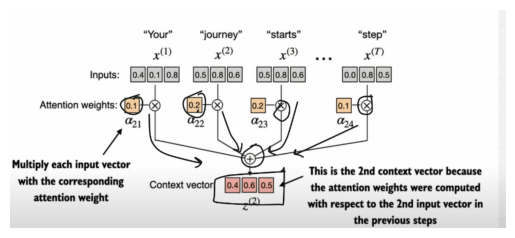

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path first
image_path = r"images\Screenshot 2025-03-15 164311.png"

# Load the image
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()




In [89]:
query = inputs[1]
context_vector_2 = torch.zeros(query.shape)
    
for i,x_i in enumerate(inputs):
    print(attn_scores_2_naive[i]) 
    context_vector_2  +=attn_scores_2_naive[i]*x_i
    
print(context_vector_2)
    
        

tensor(0.4059)
tensor(0.2011)
tensor(0.1668)
tensor(0.1132)
tensor(0.0662)
tensor(0.0469)
tensor([1.0730, 1.1166, 1.2734])


In [90]:
# now we will find attention scores /weight and context vector for all
#attention scores are done using dot product
#attention weight are gen using normalization of scores




In [91]:
attn_scores = torch.empty(6,6)



for i , x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)
     
print(attn_scores)

# but its not good to use 2 for loop since it has O(n^2) time which is slow
# so we should use matrix multiplication instead of this

tensor([[5.2722, 4.2748, 4.4658, 3.6956, 3.2696, 2.4765],
        [4.2748, 3.5726, 3.3853, 2.9975, 2.4606, 2.1158],
        [4.4658, 3.3853, 5.1324, 4.4598, 3.7105, 3.2221],
        [3.6956, 2.9975, 4.4598, 4.7315, 3.1255, 3.9277],
        [3.2696, 2.4606, 3.7105, 3.1255, 2.6942, 2.1983],
        [2.4765, 2.1158, 3.2221, 3.9277, 2.1983, 3.5138]])


In [92]:
attn_scores= inputs @inputs.T # product of inputs matrix and its transpose
attn_scores

tensor([[5.2722, 4.2748, 4.4658, 3.6956, 3.2696, 2.4765],
        [4.2748, 3.5726, 3.3853, 2.9975, 2.4606, 2.1158],
        [4.4658, 3.3853, 5.1324, 4.4598, 3.7105, 3.2221],
        [3.6956, 2.9975, 4.4598, 4.7315, 3.1255, 3.9277],
        [3.2696, 2.4606, 3.7105, 3.1255, 2.6942, 2.1983],
        [2.4765, 2.1158, 3.2221, 3.9277, 2.1983, 3.5138]])

In [93]:
attn_weights = torch.softmax(attn_scores , dim =-1) 
print(f"attn_weights : {attn_weights} \n")
# dim=-1 to apply the normalization along the last dimension of the attn_socres tensor
# basically we are normalizing across the column so that sum of each column is 1 ,

#[1,2,3,4,5,6,7] normalizing across column gives [......] whose individual's sum is 1 

# if we normalize across rows the sum of index[0] of each array will be 1 and so for index[i] , 
# but since we want to nomralizz each array we used -1 to noramalize accross column for each array....

all_context_vector = attn_weights @ inputs # dot_product of attn_weights and inputs, same as before but using dot_product

print(all_context_vector)

# the value of tensor of journey is as same as before



attn_weights : tensor([[0.4509, 0.1663, 0.2013, 0.0932, 0.0609, 0.0275],
        [0.4059, 0.2011, 0.1668, 0.1132, 0.0662, 0.0469],
        [0.1984, 0.0674, 0.3865, 0.1973, 0.0932, 0.0572],
        [0.1206, 0.0600, 0.2590, 0.3399, 0.0682, 0.1522],
        [0.2096, 0.0934, 0.3258, 0.1815, 0.1179, 0.0718],
        [0.0858, 0.0598, 0.1809, 0.3663, 0.0650, 0.2422]]) 

tensor([[1.0526, 1.1378, 1.3335],
        [1.0730, 1.1166, 1.2734],
        [1.2958, 0.7595, 1.3562],
        [1.4757, 0.6419, 1.1522],
        [1.2618, 0.7900, 1.3130],
        [1.5525, 0.5814, 1.0189]])


# #IMP : why to use trainanle weights and not untrained weights : https://youtu.be/eSRhpYLerw4?si=jYhwg9G6o9EIMjUq 1:14:00

# #SELF ATTENTION MECHANISM : 

In [94]:
# here we will generate 3 matrix , Query(Q) , key(K) , Value(V) matrixs , how ?

# so ITS CONVERTING INPUT MATRIX OR EMBEDDING INTO KEY QUERY AND VALUE VECTORS

# So at first we have INPUT MATRIX , 


# PART A :- converting input embeddding into W Q V vectors

# step 1 : generate input matrix


# step 2 : generate weight matrix for each query , key and value matrix....)

# Wq(weight matrix for query) , Wk ( weight matrix for key ) , Wv( weight matrix of value)

# step 3: multiplty Wq ,Wv, Wk with Input matrix seperatly to generate query value and key matrix

In [95]:
# STEP 1 :

inputs = nn.Parameter(torch.rand(6,3), requires_grad=False)  # ( as before)

x_2= inputs[1] #A journey matrix [0.3720, 0.5374, 0.9551]

# weight matrix is of B X C 

d_in=inputs.shape[1] #B inner dimension , it has to match the size of inputs bcz , Y X A * A X C = Y X C  matrix for matrix mul

d_out = 2 #C outer dimension , it can be any value
print(inputs)

Parameter containing:
tensor([[0.2309, 0.2668, 0.0144],
        [0.9475, 0.6344, 0.8746],
        [0.6738, 0.5275, 0.3124],
        [0.0256, 0.8616, 0.3111],
        [0.2719, 0.3397, 0.2668],
        [0.9047, 0.7518, 0.0770]])


In [96]:
torch.manual_seed(123)

W_query = nn.Parameter(torch.rand(d_in , d_out), requires_grad=False)
W_key = nn.Parameter(torch.rand(d_in , d_out), requires_grad=False)
W_value = nn.Parameter(torch.rand(d_in , d_out), requires_grad=False)

In [97]:
print(W_query ,"\n")
print(W_key,"\n")
print(W_value,"\n")

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]]) 

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]]) 

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]]) 



In [98]:
Query_2 = x_2 @ W_query
Key_2 = x_2 @ W_key
Value_2 = x_2 @ W_value

# query , key and value matrix for journey vector
print(f"{Query_2} \n\n {Key_2} \n\n {Value_2}")

tensor([0.5049, 1.6841]) 

 tensor([0.5219, 1.1589]) 

 tensor([0.3761, 1.1648])


In [99]:
query = inputs @ W_query
Key= inputs @ W_key
Value = inputs @ W_value

In [100]:
query , Key , Value

(tensor([[0.1366, 0.3155],
         [0.5049, 1.6841],
         [0.3554, 0.9820],
         [0.2474, 0.8761],
         [0.1857, 0.6055],
         [0.4628, 1.0517]]),
 tensor([[0.0852, 0.2274],
         [0.5219, 1.1589],
         [0.2876, 0.6669],
         [0.2602, 0.8423],
         [0.1838, 0.4579],
         [0.2862, 0.6917]]),
 tensor([[0.1036, 0.1645],
         [0.3761, 1.1648],
         [0.2549, 0.6029],
         [0.3114, 0.6086],
         [0.1597, 0.4107],
         [0.3154, 0.5436]]))

In [101]:
# PART B - computing attention scores

# now iinstead of finding attention_scores between 2 input embedding vector ,
# we will find attention_scores between particular query of token and key of other words...

# each word with query will attention_scores with all the words's key 

# NOTE : attention_scores are find between query and key of input and target word

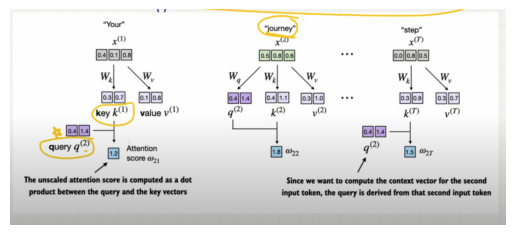

In [102]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path first
image_path = r"images\Screenshot 2025-03-15 204420.png"

# Load the image
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()

In [103]:
# to find attention score between QUERY of JOURNEY and other words...
# we will use @ as usual

attention_scores_2 = Query_2 @ Key.T # Key.T mran transpose of Key
# we cant  Query_2 @ Key bcz query_2 is 1X2 and key is 6X2 , so we need 1X6 matrix since we need attention score for Journey with every word
# thats why we need Key.T for 2X6 , 1X2 @ 2X6 = 1X6 , 
# we didnt do 2X1 @ 6X2 bcz it is invalid dot ptoduct multiplication

attention_scores_2 # it gives the attention_scores of journey with other words including itself

# well these scores doesnt mean anyting now , bcz we havent trained them yet

tensor([0.4259, 2.2153, 1.2684, 1.5499, 0.8640, 1.3095])

In [104]:
atten_score_matrix = query @ Key.T
atten_score_matrix 
# atten_score of each word with every other word
# but we need to normalize them first

tensor([[0.0834, 0.4369, 0.2497, 0.3013, 0.1696, 0.2573],
        [0.4259, 2.2153, 1.2684, 1.5499, 0.8640, 1.3095],
        [0.2535, 1.3235, 0.7571, 0.9196, 0.5150, 0.7810],
        [0.2203, 1.1444, 0.6554, 0.8023, 0.4466, 0.6768],
        [0.1535, 0.7987, 0.4572, 0.5583, 0.3114, 0.4720],
        [0.2785, 1.4603, 0.8345, 1.0062, 0.5666, 0.8599]])

In [105]:
# NOTE : BEFORE NORMALIZING THE VALUES ARE SCALED BY some value ,
# and that value is sqrt(d_key) , i.e we divide them by square root of the embedding dimension of the keys and here it is 2 ,
# keys.shape= 6X2 , so d = sqrrt(2) , it is used to make the variance close to 1 
# https://youtu.be/UjdRN80c6p8?si=RqgbCraM__PKwoQe 45:00 for more detail
d_k = Key.shape[-1]
scaled_dot_product = atten_score_matrix / (d_k**0.5)
print(d_k)

2


In [106]:
#normalization
attn_weights = torch.softmax(scaled_dot_product , dim =-1) 
print(f"attn_weights : {attn_weights} \n")

# context vector
all_context_vector = attn_weights @ Value # dot_product of attn_weights and inputs, same as before but using dot_product

print(all_context_vector)


attn_weights : tensor([[0.1477, 0.1897, 0.1662, 0.1723, 0.1570, 0.1671],
        [0.0847, 0.3003, 0.1537, 0.1876, 0.1155, 0.1582],
        [0.1134, 0.2417, 0.1620, 0.1817, 0.1365, 0.1647],
        [0.1198, 0.2303, 0.1630, 0.1808, 0.1406, 0.1655],
        [0.1330, 0.2099, 0.1648, 0.1771, 0.1487, 0.1666],
        [0.1088, 0.2508, 0.1611, 0.1819, 0.1333, 0.1640]]) 

tensor([[0.2604, 0.6056],
        [0.2877, 0.7040],
        [0.2743, 0.6540],
        [0.2715, 0.6440],
        [0.2662, 0.6251],
        [0.2764, 0.6618]])


In [107]:
class SelfAttention_v1(nn.Module):
    
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_values = nn.Parameter(torch.rand(d_in,d_out))
        
    def forward(self,x):
        
        keys = x @ self.W_key
        query = x @ self.W_query
        values = x @ self.W_values
        
        attn_scores= query @ keys.T
        attn_weights= torch.softmax(
            attn_scores/keys.shape[-1]**0.5 ,dim=-1
        )
        
        context_vec = attn_weights @ values
        
        return context_vec

In [108]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2604, 0.6056],
        [0.2877, 0.7040],
        [0.2743, 0.6540],
        [0.2715, 0.6440],
        [0.2662, 0.6251],
        [0.2764, 0.6618]], grad_fn=<MmBackward0>)


In [109]:
# we can use nn.Linear to generate random initial values , its more effective than Paramater bcz its more stbale and optimized values are generated with it 
# it can also be used in NN tasks

class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

In [110]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs)) # it works like sa_v2.forward(inputs)



tensor([[-0.0114,  0.1555],
        [-0.0084,  0.1666],
        [-0.0100,  0.1608],
        [-0.0104,  0.1600],
        [-0.0106,  0.1579],
        [-0.0103,  0.1612]], grad_fn=<MmBackward0>)


In [111]:
# Query is the the matrix we are focusing on and its main basis of our journey
# Key is the path we use for our journey 
# while value is used in the goal of our journey
# or something like that

# #CAUSAL ATTENTION

-> what it does is it restricts the model to only consider previous and current inputs in a sequence , when processing any given token .

-> this in contrast to self attention mechanism which allows access to entire input sequence at once

-> generally we map the attention scores of a query/token with all the other tokens , we dont look whether the tokens we are mapping attention socres to came before the query or not , we only consider that they weill be mapped after the query , BUT IN CAUSAL WE CONSIDER BOTH THAT WHETHER A TOKEN HAS APPEARED BEFORE OR NOT .

-> when computing attention scores , the causal attention mechanism ensures that the model only factors in tolen that occur at or befpre the current token in the sequence.

-> to achieve thhis in GPT like LLM , for each token processed , we mask out the fututre tokens , which come after the current token in he next text.



<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_16348\787278265.py:5: SyntaxWarning: invalid escape sequence '\S'
  image_path = "images\Screenshot 2025-03-15 231833.png"


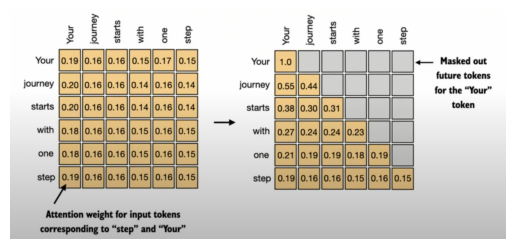

In [112]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path first
image_path = "images\Screenshot 2025-03-15 231833.png"

# Load the image
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()



But what does masked out attention scores of token represent 🤔 ?

-> so what happens is , those token who havent been occured or appeared before the word wont get their attentionn scores, and will get masked out.

-> but what is it ? 

-> consider as , WE DONT KNOW ABOUT EVERY WORD , SO WE WILL GIVE ATTENTION SCOES ONLY TO THOSE WORDS WHICH HAVE BEEN APPEARD BEFORE AND OTHER WILL GET MASKED OUT ( ATT_SCORE = 0)

this masking is also called as causal attention mask





In [113]:
queries = sa_v2.W_query(inputs)

keys = sa_v2.W_key(inputs)

attn_scores = queries @ keys.T

attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5 , dim=1)
print(attn_weights)

tensor([[0.1630, 0.1768, 0.1680, 0.1615, 0.1661, 0.1646],
        [0.1514, 0.2166, 0.1731, 0.1367, 0.1633, 0.1589],
        [0.1569, 0.1966, 0.1706, 0.1495, 0.1649, 0.1615],
        [0.1571, 0.1948, 0.1701, 0.1516, 0.1649, 0.1614],
        [0.1609, 0.1844, 0.1693, 0.1558, 0.1658, 0.1639],
        [0.1547, 0.2014, 0.1705, 0.1492, 0.1644, 0.1598]],
       grad_fn=<SoftmaxBackward0>)


In [114]:
context_length =attn_scores.shape[0]

mask_simple = torch.tril(torch.ones(context_length,context_length))

print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [115]:
masked_simple = attn_weights*mask_simple
masked_simple

tensor([[0.1630, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1514, 0.2166, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1569, 0.1966, 0.1706, 0.0000, 0.0000, 0.0000],
        [0.1571, 0.1948, 0.1701, 0.1516, 0.0000, 0.0000],
        [0.1609, 0.1844, 0.1693, 0.1558, 0.1658, 0.0000],
        [0.1547, 0.2014, 0.1705, 0.1492, 0.1644, 0.1598]],
       grad_fn=<MulBackward0>)

In [116]:
# these cant be our attention weights since all columsn arent summing upto 1 , so we need to normalize

masked_simple = masked_simple / masked_simple.sum(dim=1, keepdim=True)
masked_simple

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4113, 0.5887, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2993, 0.3752, 0.3255, 0.0000, 0.0000, 0.0000],
        [0.2333, 0.2892, 0.2525, 0.2250, 0.0000, 0.0000],
        [0.1925, 0.2205, 0.2025, 0.1863, 0.1982, 0.0000],
        [0.1547, 0.2014, 0.1705, 0.1492, 0.1644, 0.1598]],
       grad_fn=<DivBackward0>)

In [117]:
# the fact is what we are doing is still nor correct, we dont need the future infulence of words/tokens in our matrix ,
# but we already had our matrix influenced by future tokens in atnn_weight since we applied softmax on it.....
# so we need to avoid this and need a smarter way for this......
# what if , 
# attention_scores - > upper triangular mask ( tril ) -> softmax



In [118]:
print(attn_scores)

tensor([[-0.0022,  0.1126,  0.0400, -0.0158,  0.0245,  0.0119],
        [-0.0170,  0.4898,  0.1723, -0.1617,  0.0898,  0.0518],
        [-0.0086,  0.3111,  0.1099, -0.0763,  0.0618,  0.0328],
        [-0.0070,  0.2971,  0.1052, -0.0579,  0.0616,  0.0313],
        [-0.0057,  0.1864,  0.0658, -0.0515,  0.0360,  0.0197],
        [-0.0077,  0.3652,  0.1296, -0.0588,  0.0780,  0.0385]],
       grad_fn=<MmBackward0>)


In [119]:
mask = torch.triu(torch.ones(context_length,context_length),diagonal=1)
mask

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [120]:
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)
masked

tensor([[-0.0022,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.0170,  0.4898,    -inf,    -inf,    -inf,    -inf],
        [-0.0086,  0.3111,  0.1099,    -inf,    -inf,    -inf],
        [-0.0070,  0.2971,  0.1052, -0.0579,    -inf,    -inf],
        [-0.0057,  0.1864,  0.0658, -0.0515,  0.0360,    -inf],
        [-0.0077,  0.3652,  0.1296, -0.0588,  0.0780,  0.0385]],
       grad_fn=<MaskedFillBackward0>)

In [121]:
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5 , dim=1)
attn_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4113, 0.5887, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2993, 0.3752, 0.3255, 0.0000, 0.0000, 0.0000],
        [0.2333, 0.2892, 0.2525, 0.2250, 0.0000, 0.0000],
        [0.1925, 0.2205, 0.2025, 0.1863, 0.1982, 0.0000],
        [0.1547, 0.2014, 0.1705, 0.1492, 0.1644, 0.1598]],
       grad_fn=<SoftmaxBackward0>)

In [122]:
# it will ensre that we dont have a data leakage problem

In [123]:
# dropout is usedto prevent overfitting and underfitting by reducing a random number of neurons so that other neurons who arent active can also perform work and identify patterns

# here dropout randomly switches off some attention weights normally half , but companies uses dropout rate of 0.1- 0.2

torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A switches off 50% of weight randomly
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [124]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.1773, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6509, 0.0000, 0.0000, 0.0000],
        [0.4665, 0.5784, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3850, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4028, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [125]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose 
        # transpose of num_tokens and d_in not for b
        
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

In [126]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) #its a 3D tenor with 2 batches containing 6 token and each token has 3 vector embedding

torch.Size([2, 6, 3])


In [127]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [128]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


In [129]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
# 2heads , each head has 2 dimensional d out , so total d_out is 4
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.2097, -0.1383,  0.1910,  0.1819],
         [-0.5918, -0.0910,  0.5131,  0.3168],
         [-0.5692, -0.1266,  0.5332,  0.3439],
         [-0.5080, -0.1640,  0.4773,  0.3561],
         [-0.4764, -0.1454,  0.4444,  0.3275],
         [-0.5194, -0.1900,  0.4867,  0.3712]],

        [[-0.2097, -0.1383,  0.1910,  0.1819],
         [-0.5918, -0.0910,  0.5131,  0.3168],
         [-0.5692, -0.1266,  0.5332,  0.3439],
         [-0.5080, -0.1640,  0.4773,  0.3561],
         [-0.4764, -0.1454,  0.4444,  0.3275],
         [-0.5194, -0.1900,  0.4867,  0.3712]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


https://youtu.be/K5u9eEaoxFg?si=61JHayCs9Vh6wXNu

In [130]:
#instead of splitting input into 2 head why not first get queries matrix thenn divide into 2 query matrix ,to decrease the computatoin token_embedding_layer

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec


In [131]:
a = torch.tensor([  # 1
[ #2
    [ #3
        [0.2745, 0.6584, 0.2775, 0.8573], #A #4
        [0.8993, 0.0390, 0.9268, 0.7388],
        [0.7179, 0.7058, 0.9156, 0.4340]
    ],
    [
        [0.0772, 0.3565, 0.1479, 0.5331],
        [0.4066, 0.2318, 0.4545, 0.9737],
        [0.4606, 0.5159, 0.4220, 0.5786]
    ]
]
    ])

# 1,2,3,4  called as 2,3,4


In [132]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [133]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)
second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


In [134]:
context_length

6

In [135]:
batch

tensor([[[0.2309, 0.2668, 0.0144],
         [0.9475, 0.6344, 0.8746],
         [0.6738, 0.5275, 0.3124],
         [0.0256, 0.8616, 0.3111],
         [0.2719, 0.3397, 0.2668],
         [0.9047, 0.7518, 0.0770]],

        [[0.2309, 0.2668, 0.0144],
         [0.9475, 0.6344, 0.8746],
         [0.6738, 0.5275, 0.3124],
         [0.0256, 0.8616, 0.3111],
         [0.2719, 0.3397, 0.2668],
         [0.9047, 0.7518, 0.0770]]])

In [136]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.3527,  0.2160,  0.1825,  0.3687, -0.1240,  0.1458],
         [-0.3198,  0.0609,  0.3412,  0.5443, -0.1276,  0.3372],
         [-0.3361,  0.0604,  0.3514,  0.5333, -0.1170,  0.3354],
         [-0.3565,  0.0512,  0.3059,  0.5184, -0.1122,  0.2924],
         [-0.3519,  0.0689,  0.2954,  0.5024, -0.1167,  0.2801],
         [-0.3612,  0.0623,  0.2984,  0.5140, -0.1066,  0.2834]],

        [[-0.3527,  0.2160,  0.1825,  0.3687, -0.1240,  0.1458],
         [-0.3198,  0.0609,  0.3412,  0.5443, -0.1276,  0.3372],
         [-0.3361,  0.0604,  0.3514,  0.5333, -0.1170,  0.3354],
         [-0.3565,  0.0512,  0.3059,  0.5184, -0.1122,  0.2924],
         [-0.3519,  0.0689,  0.2954,  0.5024, -0.1167,  0.2801],
         [-0.3612,  0.0623,  0.2984,  0.5140, -0.1066,  0.2834]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 6])


what is context length in multihead attention
ChatGPT said:
In Multi-Head Attention, the context length (also called sequence length) refers to the number of tokens in the input sequence that the model can attend to at once.

🔹 What is Context Length?
In simple terms:
➡️ Context Length = Number of tokens the attention mechanism considers when computing attention scores.

For example:

If your text is: "Your journey starts with one step"
And each word is treated as one token, the context length = 6.
This means the attention mechanism will consider 6 tokens to compute relationships.
🔹 Why is Context Length Important?
Longer Context = More Information
➤ A longer context allows the model to capture deeper dependencies (e.g., long-term context in essays or books).

Shorter Context = Faster Computation
➤ A smaller context length speeds up processing but may lose some connections between distant tokens.

Trade-off Between Memory and Performance
➤ Increasing context length requires more memory and computational power.

# # Part 3 of stage 1 : LLM ARCHITECTTURE

In [137]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [138]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        # make token embeddings, The embedding layer will create a matrix of shape: (50257, 768)

        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        # positional embedding of size 1024(rows) X 768C(col.) will be created
        #768 is like densor vector length
        
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        # to dropout some attention_scores or something
        
        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        #in_idx is assumed to be a 2D tensor with shape (batch_size, seq_len).
        #The .shape attribute returns a tuple of dimensions, e.g., (32, 128).
        
        
        tok_embeds = self.tok_emb(in_idx) # to create token embedding of input indexed
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        # to create positional embedding of input and arrange them in sequence and store on device
        
        x = tok_embeds + pos_embeds # as we do token_embedding + positoinal_embedding for the input
        
        x = self.drop_emb(x) #drop some inputs emdedding
        
        x = self.trf_blocks(x) # the number of transformer block in this gpt2 model we are creating (or something )
        
         
        x = self.final_norm(x) # normalization 
        
        logits = self.out_head(x)
        return logits # it will give us the number 4 rows and 50257 columns to predict which token should come next or something 
       #this logit is for both the batches we gave (Every effort moves you) will have 4 predicted ouputs bcz ,
       # 1st token predicttion : every (predict)
       #  2nd token predicttion: every effort (predict)
       # 3rd token predicttion : every effort moves (predict)
    #    4th token predicttion : every effort moves you (predict)
    # and so for the nect text2 i.e every day holds a 


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

so how does the predicton will happen of next token ??
for " Every effort moves you " we need to find next token after you .....

so lets go step by step - > for every word we will have a probability distribution of 50257 words/tokens in the vocab , the token with highest probability will be chosen as next word (predicted)

1) Every ( it will have 50257 token with their probability , so lets say the next word was the tokenID 40,000 that had the highest probability , so we will go to lookup table to find that token and return it , lets say " step ")

2) Every step ( now we will take "Every step " as input and predict the next token with both of them , and this continues)

In [139]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [140]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


# Layer Normalization

In [141]:
# do such that the mean is 0 and variance is 1 , using (Xi-mean)/sqrt(var)

In [142]:
torch.manual_seed(42)

batch_example = torch.rand(2,5) # 2 batches with each having 5 inputs

layer = nn.Sequential(nn.Linear(5,6),nn.ReLU()) # takes 5 inputs and produces 6 outputs using ReLU as actvn func

out = layer(batch_example)
print(out)

# now we need to apply LAYER NORMALALIZATION TO THE OUTPUT for each batch respectively

tensor([[0.8085, 0.0080, 0.0357, 0.0000, 0.4141, 0.2423],
        [0.7231, 0.0000, 0.1389, 0.0105, 0.7284, 0.3024]],
       grad_fn=<ReluBackward0>)


In [143]:
mean = out.mean(dim=-1 , keepdim=True) # dim=-1 bcz we want to take mean through column
# if we dont use keepdim=True  then it wont generate a 2D vector and will give the overall mean and we dont want overall mean , we want batch wise mean

var = out.var(dim=-1 , keepdim=True)

print(f"mean :\n {mean} \n\n var :\n {var}")

mean :
 tensor([[0.2514],
        [0.3172]], grad_fn=<MeanBackward1>) 

 var :
 tensor([[0.1012],
        [0.1121]], grad_fn=<VarBackward0>)


In [144]:
out_norm = (out-mean)/torch.sqrt(var)

out_norm

tensor([[ 1.7513, -0.7653, -0.6783, -0.7904,  0.5115, -0.0288],
        [ 1.2122, -0.9474, -0.5326, -0.9161,  1.2281, -0.0442]],
       grad_fn=<DivBackward0>)

In [145]:
# its just a matrix operation

# [                                                           [
#     [0.8085, 0.0080, 0.0357, 0.0000, 0.4141, 0.2423]  ---       [0.2514]
#     [0.7231, 0.0000, 0.1389, 0.0105, 0.7284, 0.3024]            [0.3172]
# ]                                                           ]
# -----------------------------------------------------------------------------------
#                               variance

In [146]:
mean = out_norm.mean(dim=-1 , keepdim=True)
var = out_norm.var(dim=-1 , keepdim=True)
print(f"mean :\n {mean} \n\n var :\n {var}")

mean :
 tensor([[-9.9341e-09],
        [ 3.9736e-08]], grad_fn=<MeanBackward1>) 

 var :
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [147]:
torch.set_printoptions(sci_mode=False)
print(f"mean :\n {mean} \n\n var :\n {var}")

mean :
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>) 

 var :
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [148]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True) # mean along with col
        var = x.var(dim=-1, keepdim=True, unbiased=False) # var along with col
        norm_x = (x - mean) / torch.sqrt(var + self.eps) # self.eps is used to avoid division by 0
        return self.scale * norm_x + self.shift
    
# scale and shift are 2 trainable parameters that LLM adjusts during training 
# doing so would improve the mdoel performance on its training task
# it allows the model to learn appropriate scaling and shifting that besr suit the data it is processing


In [149]:
torch.manual_seed(42)
ln = LayerNorm(emb_dim=5)

OP = ln(batch_example)

mean = OP.mean(dim=-1 , keepdim=True) 
var = OP.var(dim=-1 , keepdim=True) # aling col we take var
        
print(f"OP : \n {OP} \n\nmean :\n {mean} \n\n var :\n {var}")

OP : 
 tensor([[ 0.6731,  0.7981, -1.2337,  0.9673, -1.2048],
        [ 0.1814, -0.9364,  0.8072,  1.2848, -1.3370]], grad_fn=<AddBackward0>) 

mean :
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>) 

 var :
 tensor([[1.2498],
        [1.2499]], grad_fn=<VarBackward0>)


# GELU activation

In [150]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self,x):
        return 0.5*x*(1+torch.tanh(
            torch.sqrt(torch.tensor(2.0/torch.pi))*
            (x + 0.044715 * torch.pow(x,3))
        ))

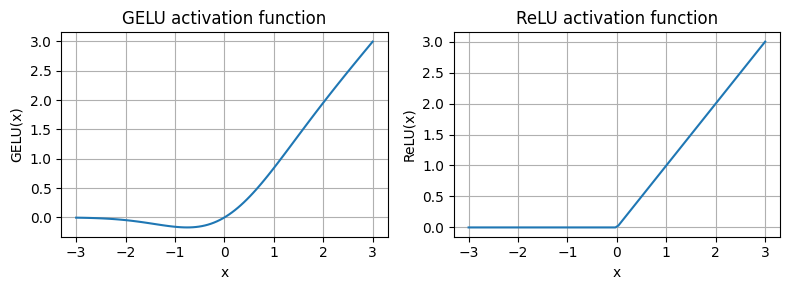

In [151]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

# in relu , neuron with -ve input cant contribute since their output is 0 with ReLU,
# in relu these neuron with -ve output are called dead neuron and dont participate in NN causing problem
# but with Gelu the neuron with -ve output can still contribute bcz they dont give 0 as output for -ve neuron

In [152]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            # the number of inputs are 768 and number of neuron in hidden layer is 4*768
            
            GELU(),# gelu actvn func we defined ,  takes input from inputs and put to each hidden layer neuron
            
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), # the output dim is 768 , it takes input from 4*768 hidden neurons
        )

    def forward(self, x):
        return self.layers(x)

In [153]:
print(GPT_CONFIG_124M["emb_dim"])


768


In [154]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)
# here we can see the input and output dimension are same(preserved) and the weights are changed on neurons
out

torch.Size([2, 3, 768])


tensor([[[-0.0054, -0.0797,  0.0663,  ...,  0.2233, -0.0117,  0.0114],
         [ 0.0144,  0.0674,  0.0832,  ...,  0.2315, -0.0773, -0.0503],
         [-0.0314, -0.0265,  0.0826,  ...,  0.2011, -0.0109, -0.0348]],

        [[-0.0012,  0.0061,  0.0253,  ...,  0.2241,  0.0202,  0.1021],
         [-0.0053, -0.0930,  0.1117,  ...,  0.1725, -0.0275, -0.0050],
         [ 0.0241, -0.0798,  0.0792,  ...,  0.2272,  0.0785, -0.0843]]],
       grad_fn=<ViewBackward0>)

  # Note : in gpt 2 there are 12 transformer blocks 

# # shortcut connections 

it creates an alternative path for the gradient to flow , by skipping one or more layers...

`it is achieved by adding the output of one layer ot the output of latter layer....`

proposed to solve the problem of vanishing gradients.

WHAT IS THIS VANISHING GRADIENTS ??

when we backpropogate the GRADIENTS of neurons become small , and then learning becomes stagnant , bcz the gradient are small which causes the weight change to be so small and no change in weights causing no learning by neurons.....

when we say gradient it means THE GRADIENT MATRIX OF ALL THE GRADIENT IN THE NEURONS OF THAT PARTICULAR HIDDEN LAYER .....

4 hidden layer has 4 gradient matrix . 

then there is a GRADIENT FLOW , the gradient flow direction is from the ouput layer to input layer gradient.....

W(new) = W(old) - a * del(L)/del(w(old))  L = loss , w = weight,

if gradient becomes small means del(L)/del(w(old)) becomes small ~=0 the w(new) = w(old) - 0 causing no change in weights.....

In [155]:
# mathematically it can be done through ->

# Y(L+1) = f(Y(L)) + Y(L)

# L=loss , 


# del(L)/del(Y(L)) = { del(L)/del(Y(L+1)) } * { del(Y(L+1)) / del(Y(L))}
# del(L)/del(Y(L)) = { del(L)/del(Y(L+1)) } * { [del f(Y(L)) / del(Y(L)) ]+ 1 }


# del = partial derivative



In [156]:
#making a DNN of 6 layer with [3,3,3,3,3,1] , 5layer with 3 meuron and o.p layer with 1 neuron

class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        
        # use_shortcut if its true we will use shortcut connection else not
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            # each neuron takes 3 input and gives 3 output.
            # we generally say , input neuron ,output neuron which is also cool
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x


In [157]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=False
)

In [158]:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [159]:
print_gradients(model_without_shortcut, sample_input)
# with the backword pass without shortcut , the 1st layer had mean gradient ~=0 which isnt good

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041653171182
layers.3.0.weight has gradient mean of 0.001398873864673078
layers.4.0.weight has gradient mean of 0.005049646366387606


In [160]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

# the mean gradient with backpropogation is quite good and not close to 0  more like 0.2 is good enough in itself. 

layers.0.0.weight has gradient mean of 0.2216978669166565
layers.1.0.weight has gradient mean of 0.20694100856781006
layers.2.0.weight has gradient mean of 0.3289698660373688
layers.3.0.weight has gradient mean of 0.2665731906890869
layers.4.0.weight has gradient mean of 1.3258538246154785


# Now we will build transformwer using all these things we did above....


after building transformer we can successfully predict the next word or token easily 

dropout helps in increasing the generalizability of the NN

when a trasnformer block process an input sequence , each element is represented by a fixed size vector.

The operations withhin the transformer block such as multi-head attention and feed FeedForwardlayer are designed to transform the input vector such that their dimensionality is preserved

the output shape of the transformer block is same as input , the dimensionality doesnt changes and is preseved in an uniform manner thats why we can stack multiple transformers......



<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_16348\1831909089.py:6: SyntaxWarning: invalid escape sequence '\S'
  image_path = "images\Screenshot 2025-03-16 233432.png"


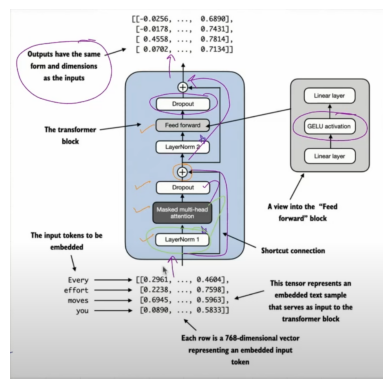

In [161]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image

image_path = "images\Screenshot 2025-03-16 233432.png"
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()



In [162]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg) # feed forward class , it has GELU class in it
        self.norm1 = LayerNorm(cfg["emb_dim"]) # Layer normalization class as we defined before , beofre MHA 
        self.norm2 = LayerNorm(cfg["emb_dim"]) # Layer normalization class as we defined before , before FF
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"]) # drop out class , to drop some neurons

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x) # layer normalization 
        x = self.att(x)  
        # Shape [batch_size, num_tokens, emb_size] 
        # masked multihead attention to calculae attention scores
        x = self.drop_shortcut(x) # dropout
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x #( new shortcut is output of dropout of 1st)
        x = self.norm2(x) # next normalization
        x = self.ff(x) # feed forward 
        # has shape 2*4*768 as ouput 2 batches 4 tokens 768 embeding dimension
        x = self.drop_shortcut(x) # drop , to stop vanishing gradient
        x = x + shortcut  # Add the original input back ( the output we got before as new input for this state path)
        

        return x
        # 2*4*768 as ouput shape

In [163]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) #A
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)
print(x , "\n\n",output)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])
tensor([[[0.2961, 0.5166, 0.2517,  ..., 0.9541, 0.8567, 0.4604],
         [0.2238, 0.3047, 0.3019,  ..., 0.5465, 0.4532, 0.7598],
         [0.6945, 0.2478, 0.4111,  ..., 0.8838, 0.4898, 0.5963],
         [0.0890, 0.7804, 0.9223,  ..., 0.4507, 0.6357, 0.5833]],

        [[0.5716, 0.9297, 0.3396,  ..., 0.0477, 0.4564, 0.2797],
         [0.0936, 0.2211, 0.3806,  ..., 0.3948, 0.4545, 0.4536],
         [0.6788, 0.1741, 0.2084,  ..., 0.5557, 0.5930, 0.0959],
         [0.3894, 0.4083, 0.0662,  ..., 0.9861, 0.9341, 0.1319]]]) 

 tensor([[[ 0.1648,  0.4002, -0.0749,  ...,  1.2646,  0.3324,  0.7243],
         [ 0.0293,  0.0498,  0.2529,  ...,  0.4698,  0.1281,  0.9749],
         [ 0.5532,  0.5788, -0.0310,  ...,  1.1544,  0.3947,  0.7600],
         [ 0.1631,  0.7128,  0.7271,  ...,  0.3312,  0.5730,  0.9258]],

        [[ 0.1787,  1.1682,  0.5810,  ...,  0.1828,  0.0073, -0.5603],
         [-0.2920,  0.6318,  0.2002,  ...

#  GPT model

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_16348\24023176.py:6: SyntaxWarning: invalid escape sequence '\S'
  image_path = "images\Screenshot 2025-03-16 235301.png"


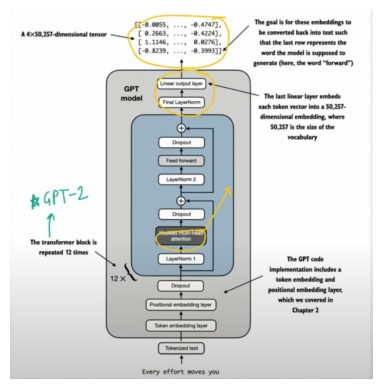

In [164]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image

image_path = "images\Screenshot 2025-03-16 235301.png"
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()


In [165]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        # token embedding
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        # positional embedding
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        # dropout of some embedding layer to more generalize the layer
        
        #chained 12 transformer block using Sequential ,which helps in chaining blocks
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        #again a final normalization of the output we got from the final transformer block
                
        
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
        # the output we got from it is called a logit matrix...
        #for every token we get 50257 logit for each tokens to predict the nexxt word
        # the logit represend the probability of that word after the token/tokens/words
        # here the ouput dimesion is 4X50257 , 4token and logit of 50257 tokens for each tokens
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        
        tok_embeds = self.tok_emb(in_idx)# convert token into token ids
        
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device)) # postional embedding
        #seq_len (Sequence Length) represents the number of tokens (or words) in the input sequence.

        # ✅ In NLP tasks, seq_len is the maximum number of tokens that the model will handle for each input.

        # 🔍 Example:

        # "Hello world" → seq_len = 2
        # "The quick brown fox" → seq_len = 4
        # Batch of sentences with 10 words each → seq_len = 10

        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        
        x = self.drop_emb(x) # dropping of some embedding
        
        x = self.trf_blocks(x) # transformer block
         
        x = self.final_norm(x) # final normalization layer
        
        logits = self.out_head(x) # probability of all tokens so that we can predict next token to add
        
        return logits

In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)
model = model.to(device)

# gives the logits value for 50257 tokens for 4 tokens for both batches
#well currently these logits dont represet probability but can give probability if we use softmax on them
#the token embedding token with the highrst probability will be the next token


Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


In [167]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [168]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [169]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [170]:
total_size_bytes = total_params * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


# Context length refers to the maximum number of tokens (words, subwords, or characters) a transformer model can process in a single forward pass.

In [171]:
# to find the next prediction word , we will extract the logit array of last token,
# use softmax on it , find the highest probability , use the tokenID of that highrst probability,
# find its token and return it
# then the new word is appended to the input and its next prediction for new token is now done and it goes on and on


# generate text from input tokens

In [172]:
import torch 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

In [173]:
def generate_text_simple(model, idx, max_new_tokens, context_size, device):
    # idx is (batch, n_tokens) array of indices in the current context

    for _ in range(max_new_tokens):  # we will create new tokens until the max_new_tokens range is reached
        
        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:].to(device)  # Ensure idx_cond is on the correct device
        
        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond.to(device))  # Ensure model input is on device
        
        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]  # it takes last row of logits out of every tensor from all batches

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx (index) of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True).to(device)  # Ensure idx_next is on device

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1).to(device)  # (batch, n_tokens+1)

    return idx


In [ ]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)

encoded_tensor = torch.tensor(encoded).unsqueeze(0).to(device)  # A
# Most PyTorch models (like transformers) expect batched data even if you are passing only one input.
# To add a new dimension because PyTorch expects input in batch and our encoded tensor was not in batch and had 4 dimensions.
# We add a new dimension to make it a batch. For a tensor with shape (2, 4), we don't need to add unsqueeze for a new dimension
# since the tensor is already in batch format.

print("encoded_tensor.shape:", encoded_tensor.shape)


encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [175]:
# model.to(device)

In [176]:
model.eval()  # A
# Setting the model to evaluation mode to disable dropout and other training-specific layers

out = generate_text_simple(
    model=model,  # Model should already be on the same device as the data
    idx=encoded_tensor,  # Already moved to device in previous code
    max_new_tokens=10,  # Determines how many new tokens that can be generated at a time
    context_size=GPT_CONFIG_124M["context_length"] ,
    device=device# Specifies the maximum context window
)

print("Output:", out)  # Display generated token IDs
print("Output length:", len(out[0]))  # Show the length of the generated sequence


Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267,
         49706, 43231, 47062, 34657]], device='cuda:0')
Output length: 14


In [177]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

# its because we havent trained the model yet , so the wieghts are now random for 124M parameters......

Hello, I am Featureiman Byeswickattribute argue logger Normandy Compton analogous


# #Stage 2  now starts  ::

# Loss function


In [178]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model=model.to(device)
model.eval();  # Disable dropout during inference

In [179]:
import tiktoken

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0).to(device) # add batch dimension ,
    #bcz we know that pytorch take input in batches , as this encoded thing will go to transformer 
    # and the input is "very effort moves you" so we gotta need to add 1 more dimension
    
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"],
    device=device
).to(device)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))
# still some gibberish output we got

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


In [180]:
# print("Sample input device:", sample_input.device)
# print("Sample target device:", sample_target.device)
# print("Model is on:", next(model.parameters()).device)

In [181]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]

targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [1107,  588, 11311]]) #  " really like chocolate"]

inputs=inputs.to(device) 
targets =targets.to(device)
# now we already made the text in batches

In [182]:
print("Sample input device:", inputs.device)
print("Sample target device:", targets.device)

Sample input device: cuda:0
Sample target device: cuda:0


In [183]:
with torch.no_grad():
    logits = model(inputs)

probas = torch.softmax(logits, dim=-1) # Probability of each token in vocabulary
print(probas.shape) # Shape: (batch_size, num_tokens, vocab_size)

torch.Size([2, 3, 50257])


In [184]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
# returns indices of maximum value
print("Token IDs:\n", token_ids) 

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]], device='cuda:0')


In [185]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


# now we will use loss function to find the loss in output 

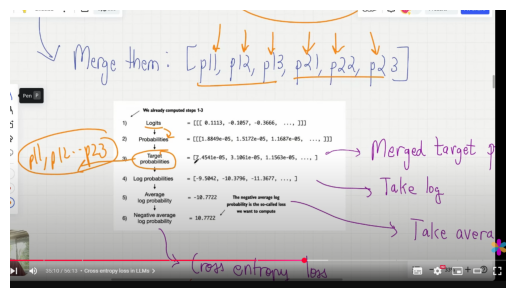

In [186]:
# the goal of LLM performing better is that we want the ouput probability of tokens inour batches to be close to 1 


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image

image_path = r"D:\web dev backup\Pytorch\images\Screenshot 2025-03-17 134203.png"
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hides axis for a cleaner look
plt.show()


1) merge both the output prob logits of batches together , 6 X 50257 , using flatten
 
2) we merge the output target of bothh the batches together , 1 X 6 , using flattten

3)  use cross entropy , nn.functional.cross_entropy[logits_flat , target_flat]


# cross entropy loss

In [187]:
probas # it is the probabulity output tensor

tensor([[[    0.0000,     0.0000,     0.0000,  ...,     0.0000,
              0.0000,     0.0000],
         [    0.0000,     0.0000,     0.0000,  ...,     0.0000,
              0.0000,     0.0000],
         [    0.0000,     0.0000,     0.0000,  ...,     0.0000,
              0.0000,     0.0000]],

        [[    0.0000,     0.0000,     0.0000,  ...,     0.0000,
              0.0000,     0.0000],
         [    0.0000,     0.0000,     0.0000,  ...,     0.0000,
              0.0000,     0.0000],
         [    0.0000,     0.0000,     0.0000,  ...,     0.0000,
              0.0001,     0.0000]]], device='cuda:0')

In [188]:
text_idx = 0 # 1st batch , since the indexing starts with 0 in tensor so we use 0

target_probas_1 = probas[text_idx , [0,1,2] ,targets[text_idx]]
print(f'text 1 : { target_probas_1}')

text_idx = 1 # 2nd batch 

target_probas_2 = probas[text_idx , [0,1,2] ,targets[text_idx]]
print(f'text 2 : { target_probas_2}')

# it will find the probability of the target tokens from the output logits we get




text 1 : tensor([    0.0001,     0.0000,     0.0000], device='cuda:0')
text 2 : tensor([    0.0000,     0.0001,     0.0000], device='cuda:0')


In [189]:
# Compute logarithm of all token probabilities
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561],
       device='cuda:0')


In [190]:
# Calculate the average probability for each token
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7940, device='cuda:0')


In [191]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7940, device='cuda:0')


In [192]:
# Logits have shape (batch_size, num_tokens, vocab_size)
print("Logits shape:", logits.shape)

# Targets have shape (batch_size, num_tokens)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


In [193]:
# more simpler way for it is first flatten it then take cross_entropy

logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()

print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [194]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)
# now we want to make the loss as low as possible

tensor(10.7940, device='cuda:0')


In [195]:
# another loss method is perplexity , measures how well the prob distbn predicted by model matches the actual distbn of words in the dataset
# its more interpretable , low perplexity score means better prediction

perplexity = torch.exp(loss)
print(perplexity)

# the perplexity is more means the token being chose is just random
# more uncertainity in predicting the token , it tells 48K tokens are more likely to be next token , which isnt good.


tensor(48725.8203, device='cuda:0')


# Evaluating LLM

In [196]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

In [197]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256, 
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [198]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}# Train/validation ratio
train_ratio = 0.90

split_idx = int(train_ratio * len(text_data))

train_data = text_data[:split_idx]

val_data = text_data[split_idx:]


torch.manual_seed(123)

## convertt the dataset into dataloader to make batches as pytorch wants batches
train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [199]:
train_data , val_data

('I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)\n\n"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it\'s going to send the value of my picture \'way up; but I don\'t think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing\'s lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn\'s "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?\n\nWell!--even

In [200]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


In [201]:
# Sanity check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

In [202]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

print(len(train_loader))
print(len(val_loader))


Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


In [203]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Training tokens: 4608
Validation tokens: 512
All tokens: 5120


In [204]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    
    #flattenning both logits and target batch and calculating the loss
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [205]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987583796183268
Validation loss: 10.98110580444336


# LLM-Pretrainning LOOP

In [206]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        
        # generate the index or tokenID of the tokens from training
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size,
            device=device
        ).to(device)

    # decoding the tokenID into token
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

In [207]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [208]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs): # the simple training we do : 
        model.train()  # Set model to training mode
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0: 
                
                #to get the training and validation loss when global_step % eval_freq == 0 matches
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                
                train_losses.append(train_loss) # appends the loss of previous step with this one
                
                val_losses.append(val_loss)
                
                track_tokens_seen.append(tokens_seen) # tracks the number of tokens the model has seen
                
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [209]:
# Note:
# Uncomment the following code to calculate the execution time
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 1
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

# Note:
# Uncomment the following code to show the execution time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 9.825, Val loss 9.931
Ep 1 (Step 000005): Train loss 8.069, Val loss 8.341
Every effort moves you,,,,,,,,,,,,,,.                                   
Training completed in 0.15 minutes.


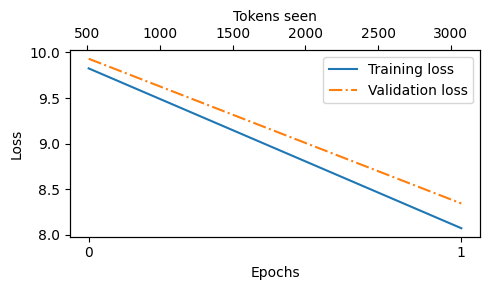

In [210]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [211]:
tokenizer = tiktoken.get_encoding("gpt2")

text = "Every effort moves you"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text, tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"],
    device=device
).to(device)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you,,,,,,.




















This memorization is expected since we are working with a very, very small training
dataset and training the model for multiple epochs. 

and we can see the validation loss is constant means nothing good is coming and model is trying to memorize
which is sign for overfitting, bcz dataset is small and epochs are morem

# control randomness and decrease overfitting

# we control the randomness using temperature scaling and randomness

In [212]:
# our goal is to reduce the randomness in the output.

# we will solve this using temperature scaling

# instead of choosing the token with the higheest probability value , we sample the next token based on prob distn score....

# we do the sampling in general , not picking the token with highest prob value.....

# bcz sometime the token witrh low prob value could be the next correct token too ......

# so its a multinomial prob distbution......

In [213]:
model.to(device) # device is there then use device
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [214]:
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"],
    device=device
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

# when we used these token the randomness was pretty high, the text was generatedd correctly but was generating random token and memorizing it.

Output text:
 Every effort moves you,,,,,,,,,,,,,,.












# Decoding strategy 1: temperature scaling

In [215]:
# lets tke a small vocab....

vocab = { 
    "closer": 0,
    "every": 1, 
    "effort": 2, 
    "forward": 3,
    "inches": 4,
    "moves": 5, 
    "pizza": 6,
    "toward": 7,
    "you": 8,
} 

inverse_vocab = {v: k for k, v in vocab.items()}

In [216]:
# findign the logits of the tokens for necxt token

next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

next_token_logits2 = next_token_logits/0.1

next_token_logits3 = next_token_logits/5

In [217]:
# using soft max to find the probabilities of the logits

#so the highst prob was given to "forward"

In [218]:
probas = torch.softmax(next_token_logits3, dim=0)

print(probas)

next_token_id = torch.argmax(probas).item()

print(next_token_id)

print(inverse_vocab[next_token_id])

tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])
3
forward


In [219]:
# here we will replcae the argmax with multinomial function

torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

# so what it does  ,???

# The multinomial function samples the next token proportional to its probability score. 


# To illustrate this, let's implement a function that repeats this
# sampling 1000 times:


toward


In [220]:
def print_sampled_tokens(probas):
    torch.manual_seed(123) # Manual seed for reproducibility
    
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    
    sampled_ids = torch.bincount(torch.tensor(sample))
    
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

# when we are iterating it 1000 times , how many times each token is choosen as next token....

153 x closer
68 x every
55 x effort
223 x forward
102 x inches
50 x moves
43 x pizza
218 x toward
88 x you


In [221]:
# but WHY IS IT CALLED TEMPERATURE SCALING ?

# temperature is just an FANCY TERM . for dividing the logits by a number greater than 0

# scaled logits = logits / temperature (value)

In [222]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

# Temperature values
temperatures = [1, 0.1, 5]  # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

##Multinomial

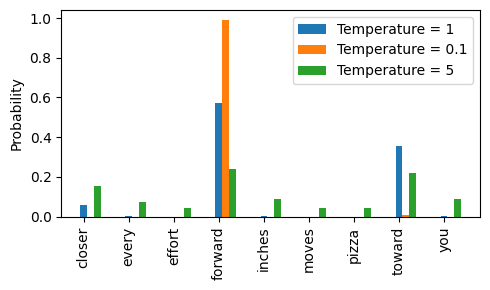

In [223]:
# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()

In [224]:
# when temperature is low the prob becomes sharp and chose only 1 value ,
# when prob is very high it distributes equual chances to all other tokens ....means the prob flatten out prob of all and prob of all comes more closer....
# it sometimes is called as deterministic and creativity , low temp = deterministic (same token pred everytime )
# high temp = creavtivty ( can chose other token too ,not same everytime ,but may choose wrong token too)
# medium = both deterministic and creative at some extent ( not chosig wrong token but choosing different but correct token/tokens most of time )


In [225]:
# workflow of temperature
# logits -> scale it with temperature -> apply softmax on it -> sample using multinomial

#  Topk sampling

In [226]:
# the issue with temperature scaling was all the tokens had chance to be the next token , i.e even unrelated token could be the next token..
# we need to remove the chance of choosing unrealted token to be the next token...

# thats why we use topk sampling.....

# we restrict the sampled tokesn to the topk most likely tokens and exclude all the other tokens

# i.e if K=3 , then we look at only top 3 token with high logit value and replcae the other with -inf , bcz e^(-inf)=0 when we use softmax



In [227]:
# lets us use topk sampling without temperature scaling for now and then we attach temp sacling later

In [228]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [229]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)

# topk retruns top logits and their position
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [230]:
# now replcae logit value with -inf to those who arent in topK

new_logits = torch.where(
    condition=next_token_logits < top_logits[-1],
    input=torch.tensor(float("-inf")), 
    other=next_token_logits
)

print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [231]:
# now we can use softmax
topk_probas = torch.softmax(new_logits, dim=0)
print(topk_probas)

# now we assure that only top tokens can be the next token

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


In [232]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    # loop untill we reach the max_new_tokens
    for _ in range(max_new_tokens):
        
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        
        logits = logits[:, -1, :] # the logit tensor we generated from GPT output

        # New: Filter logits with top_k sampling 
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            
            min_val = top_logits[:, -1]
            
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)


        # New: Apply temperature scaling
        if temperature > 0.0: 
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [233]:
for i in range (1,140,20):
    torch.manual_seed(i)

    token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=20,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=15,
    temperature=1.8
     )

    print("Output text:\n", token_ids_to_text(token_ids, tokenizer))
    
# now we can see the model isnt memorizing and generating tokens based on learning ,
# how do we knoww ??
# bcz the text it generated was found in the book..

Output text:
 Every effort moves you of of--,.-- he I-- the.,. to

 it the the the
Output text:
 Every effort moves you the. I the the,, his


.--, in in of, in the
Output text:
 Every effort moves you, of the-- the.


-- the the it and a it.



Output text:
 Every effort moves you he----


 to of.

 of

"

 I I--
Output text:
 Every effort moves you,-- of. had. of. a-- of the I I had. a the. he
Output text:
 Every effort moves you had
 a.



 of,.. in his
,, in of the
Output text:
 Every effort moves you. had the the in it of the-- his, the, in a of it,
 of


In [234]:
# workflow for decreasig randomness

# logits -> topk -> replcae with -ve inf -> logit/temperature -> softmax -> sample for multinomial

# weight loading and saving in pytorch

In [235]:
# save the model in form of dict
model  = GPTModel(GPT_CONFIG_124M)
torch.save(model.state_dict() , './LLM/LLM_v1.pth')
# we can save our parameters and again train this model with theese parameters again ....



it is also recomended to save the optimmizer state......
 like everything like value , hyperparameters , historical data such as past past gradients
<div class="alert alert-block alert-success">

Adaptive optimizers such as AdamW store additional parameters for each model weight.
AdamW uses historical data to adjust learning rates for each model parameter dynamically.
                                                   
Without it, the optimizer resets, and the model may learn suboptimally or even fail to
converge properly, which means that it will lose the ability to generate coherent text. 

Using
torch.save, we can save both the model and optimizer state_dict contents as follows:
</div>
 

# save parameters and weigths

In [236]:
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)
# # it will save the optimizer with the parameters i.e its hhistorical data so that we can resume the optimzation of model paramters later
# torch.save({
#     "model_state_dict": model.state_dict(),
#     "optimizer_state_dict": optimizer.state_dict(),
#     }, 
#     "./LLM/LLM_v1_model_and_optimizer.pth"
# )

# saving the model;s and optimizers parameters with their own key in form of object
# we can use the optimizer or model paramrters using their key when we load the model

# LOAD weights

In [237]:

# # load the model stored in form of dict

# checkpoint = torch.load("./LLM/LLM_v1_model_and_optimizer.pth")
# model = GPTModel(GPT_CONFIG_124M)
# model.load_state_dict(checkpoint["model_state_dict"])
# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
# optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
# model.train()

# LOADING PRETRAINED WEIGHTS FROM OPENAI....

`the opnAI's Gpt-2 was in tensorflow format , so we need tensorflow for it....and need to restart the kernel `

In [238]:
import tensorflow as tf
import tqdm

print("TensorFlow version:", tf.__version__)
print("tqdm version:", tqdm.__version__)

TensorFlow version: 2.19.0
tqdm version: 4.67.1


In [239]:
from gpt_download3 import download_and_load_gpt2

# download gpt2 124M params 

In [240]:
# settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

# check params and etc


In [241]:
import os
import json
import numpy as np
import tensorflow as tf

# Load settings from hparams.json
def load_settings(model_dir):
    with open(os.path.join(model_dir, "hparams.json"), 'r') as f:
        settings = json.load(f)
    return settings

# Load GPT-2 parameters from TensorFlow checkpoint
def load_gpt2_params_from_tf_ckpt(ckpt_path, settings):
    params = {"blocks": [{} for _ in range(settings["n_layer"])]}

    for name, _ in tf.train.list_variables(ckpt_path):
        variable_array = np.squeeze(tf.train.load_variable(ckpt_path, name))

        variable_name_parts = name.split("/")[1:]  # Skip the 'model/' prefix
        target_dict = params
        if variable_name_parts[0].startswith("h"):
            layer_number = int(variable_name_parts[0][1:])
            target_dict = params["blocks"][layer_number]

        for key in variable_name_parts[1:-1]:
            target_dict = target_dict.setdefault(key, {})

        last_key = variable_name_parts[-1]
        target_dict[last_key] = variable_array

    return params

# Directory path where GPT-2 files are saved
model_dir = "gpt2/124M"

# Load settings
settings = load_settings(model_dir)

# Load parameters
ckpt_path = tf.train.latest_checkpoint(model_dir)
params = load_gpt2_params_from_tf_ckpt(ckpt_path, settings)

# Display output
print("Settings:", settings)
print("Params sample:", list(params.keys())[:5])  # Display sample params keys


Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Params sample: ['blocks', 'b', 'g', 'wpe', 'wte']


In [242]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [243]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


In [244]:
# Define model configurations in a dictionary for compactness
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

# here since our context_legth was 256 and original is 1024 , so we need to change it to 1024
# along with query_key_bias = True

In [245]:
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})
gpt = GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [246]:
#checks the shape of both left and right params, if corect then assigns the right value to it
# if not matches than it will give error ,that the assigned weight arent correctly matched by shape look again the terms
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [247]:
# instead of random initilazation using nn.Embeddign parameters linear we need to use actual downloaded params

import numpy as np

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    
    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        
        
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        
        
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        
        
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        
        
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        
        
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        
        
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        
        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight, 
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        
        
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias, 
            params["blocks"][b]["attn"]["c_proj"]["b"])

        
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight, 
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        
        
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias, 
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        
        
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight, 
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        
        
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias, 
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale, 
            params["blocks"][b]["ln_1"]["g"])
        
        
        
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift, 
            params["blocks"][b]["ln_1"]["b"])
        
        
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale, 
            params["blocks"][b]["ln_2"]["g"])
        
        
        
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift, 
            params["blocks"][b]["ln_2"]["b"])

    
    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])



In [248]:
load_weights_into_gpt(gpt, params)
gpt.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [249]:
torch.manual_seed(123)

token_ids = generate(
    model=gpt,
    idx=text_to_token_ids("who won 2025 ICC championships ?", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=42,
    temperature=1.2
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 who won 2025 ICC championships ?

A lot can happen because of the nature of this world of cricket.

Even after being appointed by BCC I


# STAGE 3 : 

# FINE-TUNNING

* Fine-tunning -` Adapting a pre-trained model to a specefic task by training the model o additional data`

<!-- types  : 1 ) instruction based
         2 ) classification based


so we will talk about classification based fine-tunning at first -->

`Stage 1  : dataset preparation`
a) download the dataset.

b) pre-process the dataset

c ) create data loaders


`stage 2:  model setup`

d) initialoze model

e) load pretraned weights

f) modify model for finetuning

h) implement evaluation utilities


`stage 3 : model finetunning and usage`

i) finetune model

j) evaluate finetuned model

k) use model on new data




In [250]:
# downaloading the dataset Step 1: a)

# we will use spam and no spam classification

import urllib.request
import ssl
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    # Create an unverified SSL context
    ssl_context = ssl._create_unverified_context()

    # Downloading the file
    with urllib.request.urlopen(url, context=ssl_context) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    # Unzipping the file
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    # Add .tsv file extension
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)

sms_spam_collection\SMSSpamCollection.tsv already exists. Skipping download and extraction.


In [251]:

import pandas as pd
df = pd.read_csv(data_file_path, sep='\t' , header = None , names= ["Label","Text"])

In [252]:
print(df["Label"].value_counts())

# the data is unbalanced , ie ham are way large than spam , which can ccreate randomnsess...
# we need to equalise both ham and sms_spam_collection/

Label
ham     4825
spam     747
Name: count, dtype: int64


In [253]:
# b)

def create_balanced_dataset(df):
    
    # Count the instances of "spam"
    num_spam = df[df["Label"] == "spam"].shape[0]
    
    # Randomly sample "ham" instances to match the number of "spam" instances
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)
    
    # Combine ham "subset" with "spam"
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Label
ham     747
spam    747
Name: count, dtype: int64


In [254]:
# since now we are dealing witj spam and ham , we dont need 50K tokens_seen


balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})


In [255]:
# splitting data into train 70% test 20% and validation 10% set

def random_split(df, train_frac, validation_frac):
    # Shuffle the entire DataFrame
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Calculate split indices
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # Split the DataFrame
    train_df = df[:train_end] # 0 to 3900-1
    validation_df = df[train_end:validation_end] # 3900 to
    test_df = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)
# Test size is implied to be 0.2 as the remainder

# we could also use train test split ......

In [256]:
len(train_df) , len(validation_df) , len(test_df) 

(1045, 149, 300)

In [257]:
# c)  dataloader , comvert data into batch_size

# so what should be the context_length ?? 

# the lenght of text are different and we can set any length bcz if the length of text is more than context length , that text would get rejected.

# we can solve this issue by appending <|endoftext|> with tokenID 50256 ( from gpt2-bpe) to all text unleess untill the length of all text become equal ,
# when the lenght of all text become equal we can assign the contextlength = lenght of any text.

# ex -> Hello how are you ?  {lenght : 5}
#      you have won a lottery , claim the prize soon ! {length : 11}
     
#     can be converted into
    
#     Hello how are you ? <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|> , lenghth 11
#      you have won a lottery , claim the prize soon !  {length : 11}
     
     
#      something like this

# tokenID = 50256 bcz its the token ID of  <|endoftext|> in gpt2-bpe


# workflow : 
    
#     input text -> tokenize -> find text with longgest length -> add eof to other text to make lenght of all text same -> ensure that all sentences have same length
    
    




In [258]:
train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

In [259]:
import torch
from torch.utils.data import Dataset


class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        
        self.data = pd.read_csv(csv_file) # specify the csv file to read and assign it to data

        # Pre-tokenize texts
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Text"]
        ] 

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length
            
            # Truncate sequences if they are longer than max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]
            # checks if there are any text with legth > max_length , if yes then truncate them or delete some parts like from max_length to last

        # Pad sequences to the longest sequence 
        # add the tokenID 50256 to all the texts so that max_length of all text can be same
        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long)
        )

    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

In [260]:
train_dataset = SpamDataset(
    csv_file="train.csv",
    max_length=None,
    tokenizer=tokenizer
)

print(train_dataset.max_length)

120


In [261]:
val_dataset = SpamDataset(
    csv_file="validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)
test_dataset = SpamDataset(
    csv_file="test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

print(test_dataset.max_length)

120


In [262]:
# use dataset as input and pass it to dataloader to make it in batches


from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

In [263]:
print("Train loader:")
for input_batch, target_batch in train_loader:
    pass

print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions", target_batch.shape)

# 8 rows and 120 columns represent 120 token of text and 8 text in each batch

Train loader:
Input batch dimensions: torch.Size([8, 120])
Label batch dimensions torch.Size([8])


In [264]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

130 training batches
19 validation batches
38 test batches


# Step 2 : 

# d) initialize the model

# e) use pretrained weights

In [265]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
    f"Dataset length {train_dataset.max_length} exceeds model's context "
    f"length {BASE_CONFIG['context_length']}. Reinitialize data sets with "
    f"`max_length={BASE_CONFIG['context_length']}`"
)

In [266]:
device

device(type='cuda')

In [267]:
model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")

from gpt_download3 import download_and_load_gpt2

# settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")

model = GPTModel(BASE_CONFIG)
batch = batch.to(device)

load_weights_into_gpt(model, params)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [268]:
model = model.to(device)


In [269]:
print(next(model.parameters()).device)
print(next(model.buffers()).device)


cuda:0
cuda:0


In [270]:
text_1 = "Every effort moves you"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1, tokenizer),
    max_new_tokens=15,
    context_size=BASE_CONFIG["context_length"],
    device=device
)

print(token_ids_to_text(token_ids, tokenizer))

# just to test whether the model is working or not.....

Every effort moves you forward.

The first step is to understand the importance of your work


In [271]:
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " 'You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award.'"
)

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"],
    device=device
)

print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.'

The following text 'spam'? Answer with 'yes' or 'no': 'You are a winner


In [272]:
print(token_ids.device)


cuda:0


# adding a classification head

since we dont need 50257 token , we need only SPAM OR HAM ........

so we gonna replcaae output layer in 768 neuron in hidden layer with output of 2 neuron as spam and ham 



# selecting which layer to fine tune

we donr need to fine tuen every layer , since in transformer the lower layer is used in multiple things like capturing data and semantic meanings ,
the upper layer of the GPT model we will fune tune i.e output layer for classificaition and fine tune the 12th transformer block ,
since 11 blocks can capture the semantic meaning of it.....

-> fine tune final output head 
-> fine tune 12 th transformer block
-> fine tune the final layerNorm layer.T_destination

rest  all the other parameters will be frezed ie we wont train on the remaing layers 

In [273]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [274]:
for param in model.parameters():
    param.requires_grad = False
    
# freeze all the params updation of all layers
# means we will not update the parameters i.e freeze the model layers
# then we will tell the model that which layer we will fine tune

In [275]:
torch.manual_seed(123)

num_classes = 2
model.out_head = torch.nn.Linear(in_features=BASE_CONFIG["emb_dim"], out_features=num_classes).to(device)

# add this layer at last or at head of the final_norm layer. 768 X 2 neurons

In [276]:
print(model.out_head.weight.device)


cuda:0


In [277]:
for param in model.trf_blocks[-1].parameters(): 
    # the last i.e 12th transformer block's parameter can be updated during trainning
    param.requires_grad = True

for param in model.final_norm.parameters(): # the parameters of final_norm layer can be updated
    param.requires_grad = True

In [278]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0).to(device)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape) # shape: (batch_size, num_tokens)


Inputs: tensor([[5211,  345,  423,  640]], device='cuda:0')
Inputs dimensions: torch.Size([1, 4])


In [279]:
# sample_input, sample_target = next(iter(dataloader))
print("Sample input device:", inputs.device)
# print("Sample target device:", sample_target.device)


Sample input device: cuda:0


In [280]:
with torch.no_grad():
    
    
    outputs = model(inputs)
print("Outputs:\n", outputs)
print("Outputs dimensions:", outputs.shape) # shape: (batch_size, num_tokens, num_classes)

# we will extract the last token to find whether the text is spam and no spam , since last token has maximum attention score
# for each token there are 2 outputs.
# but why look at last output ?? 
# bcz the last output in a sliding window contains the ouput after considering all the above text ,
# i.e the ouput of last token DO YOU HAVE TIME , isnt for time only its for all DO YOU HAVE TIME . since it uses sliding window


Outputs:
 tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]], device='cuda:0')
Outputs dimensions: torch.Size([1, 4, 2])


In [281]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]], device='cuda:0')


Having modified the model, the next section will detail the process of transforming the
last token into class label predictions and calculate the model's initial prediction accuracy.

Following this, we will finetune the model for the spam classification task in the subsequent
section.

## CALCULATING THE CLASSIFICATION LOSS AND ACCURACY

In [282]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]], device='cuda:0')


In [283]:
probas = torch.softmax(outputs[:, -1, :], dim=-1)
# normalized the last logit to find prob.
print(probas)
label = torch.argmax(probas)
print("Class label:", label.item())

tensor([[    0.0005,     0.9995]], device='cuda:0')
Class label: 1


In [284]:
logits = outputs[:, -1, :]
label = torch.argmax(logits)
print("Class label:", label.item())

Class label: 1


In [285]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)

            with torch.no_grad():
                logits = model(input_batch)[:, -1, :]  # Logits of last output token
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break
    return correct_predictions / num_examples

In [286]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# As of this writing, in PyTorch 2.4, the results obtained via CPU and MPS were identical.
# However, in earlier versions of PyTorch, you may observe different results when using MPS.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#print(f"Running on {device} device.")

model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes

torch.manual_seed(123) # For reproducibility due to the shuffling in the training data loader

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# these accuracy are so bad .
# so we will use loss function to determine the loss and optimizer to optimize it.
# we can use categoricalclassentropy or cross entropy loss as loss functoin

Training accuracy: 46.25%
Validation accuracy: 45.00%
Test accuracy: 48.75%


In [287]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:, -1, :]  # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

In [288]:
# Same as in chapter 5
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item() # add the loss everytime with previous loss
        else:
            break
    return total_loss / num_batches

In [289]:
with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

# 5 bacthes not 130 bcz 130 can take so much time so we take less and it can also show result

print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 2.453
Validation loss: 2.583
Test loss: 2.322


<div class="alert alert-block alert-success">

In this section, we define and use the training function to finetune the pretrained LLM and
improve its spam classification accuracy. 
    
The training loop is the
same overall training loop we used earlier, with the only difference being that we
calculate the classification accuracy instead of generating a sample text for evaluating the
model.

</div>

<div class="alert alert-block alert-success">

The training function also closely mirrors
the train_model_simple function used for pretraining the model earlier.
                                    
The only two distinctions are that we now track the number of training examples seen
(examples_seen) instead of the number of tokens, and we calculate the accuracy after each
epoch instead of printing a sample text:

</div>

<div class="alert alert-block alert-info">
    
Step 1: Prepare inputs to the model

Step 2: Truncate sequences if they too long
    
Step 3: Pad sequences to the longest sequence

Step 4: Add batch dimension

Step 5: Model inference without gradient tracking
    
Step 6: Logits of the last output token

Step 7: Return the classified result

</div>

flow -> 

1) for each trainigng epoch  { one epoch is one complete passs over a trainign set }

2) for eeach batch in training set 

3) reset loss gradient from previous epoch

4) calculate loss on current batch

5) backward pass to calculate loss gradients

6) update model weights using loss gradients

7) print training and validation set losses

8) new : calculate classification accuracy ( and  go back to 1st step with next epoch)

In [290]:
# Overall the same as `train_model_simple` in chapter 5
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter):
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            examples_seen += input_batch.shape[0] # New: track examples instead of tokens 
            global_step += 1

            ## 130 batches: training, eval_Freq = 50 --> after 50 batches are processed in each epoch, we print train loss and val loss

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [291]:
# Same as chapter 5
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [292]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

num_epochs = 1
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.153, Val loss 2.392
Ep 1 (Step 000050): Train loss 0.617, Val loss 0.637
Ep 1 (Step 000100): Train loss 0.523, Val loss 0.557
Training accuracy: 70.00% | Validation accuracy: 72.50%
Training completed in 0.85 minutes.


In [293]:
print(next(model.parameters()).device)



cuda:0


In [294]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for examples seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

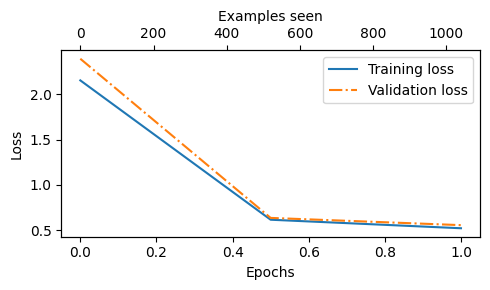

In [295]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

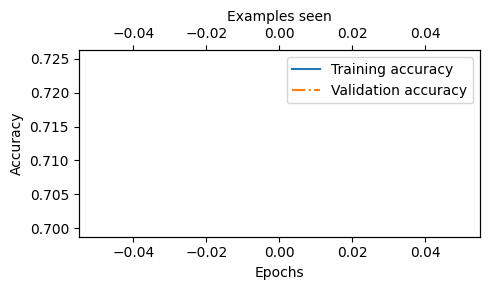

In [296]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")

In [297]:
# train_accuracy = calc_accuracy_loader(train_loader, model, device)
# val_accuracy = calc_accuracy_loader(val_loader, model, device)
# test_accuracy = calc_accuracy_loader(test_loader, model, device)

# print(f"Training accuracy: {train_accuracy*100:.2f}%")
# print(f"Validation accuracy: {val_accuracy*100:.2f}%")
# print(f"Test accuracy: {test_accuracy*100:.2f}%")

## USING THE LLM AS A SPAM CLASSIFIER

In [298]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()

    # Prepare inputs to the model
    input_ids = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[0]
    # Note: In the book, this was originally written as pos_emb.weight.shape[1] by mistake
    # It didn't break the code but would have caused unnecessary truncation (to 768 instead of 1024)

    # Truncate sequences if they too long
    input_ids = input_ids[:min(max_length, supported_context_length)]

    # Pad sequences to the longest sequence
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0) # add batch dimension

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]  # Logits of the last output token
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the classified result
    return "spam" if predicted_label == 1 else "not spam"

In [299]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length
))

not spam


In [300]:
text_2 = (
    "Hey, just wanted to check if we're still on"
    " for dinner tonight? Let me know!"
)

print(classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length
))

not spam


In [301]:
# torch.save(model.state_dict(), "./LLM/LLM_review_classifier_model_only.pth")


In [302]:
# torch.save({
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
# }, './LLM/LLM_review_classifie_model_and_optimr.pth')

In [303]:
# model_state_dict = torch.load("./LLM/LLM_review_classifier.pth")
# model.load_state_dict(model_state_dict)

# INSTRUCCTION BASED FINE-TNUNING

In [304]:
# like chatbot and personal assistant chatbots

# we do it using supervised instruction fine tuning.

# we will provide the model with input and output

In [305]:
# we have data in JSON format consisting of instruction , input and output pair .

# so to get the correct ouput we need to give instruction  and input.

import json
import os
import urllib
import ssl

def download_and_load_file(file_path, url):
    ssl_context = ssl.create_default_context()
    ssl_context.check_hostname = False
    ssl_context.verify_mode = ssl.CERT_NONE

    if not os.path.exists(file_path):
        with urllib.request.urlopen(url, context=ssl_context) as response:
            text_data = response.read().decode("utf-8")
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(text_data)
    else:
        with open(file_path, "r", encoding="utf-8") as file:
            text_data = file.read()

    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    return data


file_path = "instruction-data.json"
url = (
    "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch"
    "/main/ch07/01_main-chapter-code/instruction-data.json"
)

data = download_and_load_file(file_path, url)
print("Number of entries:", len(data))

Number of entries: 1100


In [306]:
print("Example entry:\n", data[50])

Example entry:
 {'instruction': 'Identify the correct spelling of the following word.', 'input': 'Ocassion', 'output': "The correct spelling is 'Occasion.'"}


In [307]:
print("Another example entry:\n", data[999])

Another example entry:
 {'instruction': "What is an antonym of 'complicated'?", 'input': '', 'output': "An antonym of 'complicated' is 'simple'."}


In [308]:
# Converting instruction into ALPACA format

# the researches has beeen concluded that we dont need to give the model instruction and input instruction

# There are format like ALPACA format and Phi-3 prompt 
# in alpaca , the instruciton and input is diiferent line , while in phi-3 the instruction and input are in same point.as_integer_ratio



# converting into ALPACA FORMAT

In [309]:
def format_input(entry):
    instruction_text = (
        f"Below is an instruction that describes a task. "
        f"Write a response that appropriately completes the request."
        f"\n\n### Instruction:\n{entry['instruction']}" # instruction
    )

    # if the input is "" ie not given then the ouput will be same but prompt format will be different.
    input_text = f"\n\n### Input:\n{entry['input']}" if entry["input"] else ""
    ## input 

    return instruction_text + input_text

In [310]:
# currently we are just extracting resonse from data and constructing them in instruction format we need and outputting them .
# note : we havent trained model , we are just extracting iniformation.
model_input = format_input(data[50])
desired_response = f"\n\n### Response:\n{data[50]['output']}"
# Response based on input from data

print(model_input + desired_response)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Identify the correct spelling of the following word.

### Input:
Ocassion

### Response:
The correct spelling is 'Occasion.'


In [311]:
# what is the we inserted the input that doesnt belong to data ?
# the the out put becomes mix of both of input and response and someting.
model_input = format_input(data[999])
desired_response = f"\n\n### Response:\n{data[999]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is an antonym of 'complicated'?

### Response:
An antonym of 'complicated' is 'simple'.


In [312]:
model_input = format_input(data[999])
desired_response = f"\n\n### Response:\n{data[999]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is an antonym of 'complicated'?

### Response:
An antonym of 'complicated' is 'simple'.


# splitting the data into train and test and validation data

In [313]:
train_portion = int(len(data) * 0.85)  # 85% for training
test_portion = int(len(data) * 0.1)    # 10% for testing
val_portion = len(data) - train_portion - test_portion  # Remaining 5% for validation

train_data = data[:train_portion]
test_data = data[train_portion:train_portion + test_portion]
val_data = data[train_portion + test_portion:]

In [314]:
print("Training set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))

Training set length: 935
Validation set length: 55
Test set length: 110


# step 2 : batching of data

In [315]:
# 1) format the data using prompt template (which we did before)

# 2) tokenize the data

# 3) adjust to the same length using token padding....i.e 
#     use eof tokenID to make the input of all objects equal , 
#     extract the lenght og longest input then add corresponding eof tokeID
#     to make all the inputs be of equal size . 
    

# 4) create target tokenID for training . like input-target pair  
#the input will be ->Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
# Identify the correct spelling of the following word.

### Input:
# Ocassion

# while the target will be the response 

# it can be done as , target will be the input shifted by 1 
# input = [1,2,3,4] target = [2,3,4,5]


# 5)  replace the target token ID with placeholders . 

# leave the 1st 50256 as it is , and convert evry other 50256 coming after it to -100

# ex-> target 1 = [1,2,3,50256] since there is only 1 50256 , dont replace it.
# target 2 = [1,2,3,50256,50256,50256] - > [1,2,3,50256,-100,-100]

# why to use -100 and what is its significance ??

# it comes from the cross_entropy loss IGNORE_INDEX =-100

In [316]:
import torch
from torch.utils.data import Dataset


class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data # data to be stored in data when class os loaded

        # Pre-tokenize texts
        self.encoded_texts = []
        for entry in data:
            
            # the instruction format we defined above
            instruction_plus_input = format_input(entry)
            response_text = f"\n\n### Response:\n{entry['output']}"
            full_text = instruction_plus_input + response_text
            
            self.encoded_texts.append(
                tokenizer.encode(full_text)
            )  # tokenizr the text

    def __getitem__(self, index):
        return self.encoded_texts[index]

    def __len__(self):
        return len(self.data)

In [317]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


<div class="alert alert-block alert-info">
    
Step 1: Find the longest sequence in the batch
    
Step 2: Pad and prepare inputs
    
Step 3: Remove extra padded token added earlier

Step 4: Convert list of inputs to tensor and transfer to target device

</div>

In [318]:
# it is used to pad the text usinf 50256 token based on the max length of a text input

def custom_collate_draft_1(
    batch, # take batch as input
    pad_token_id=50256,
    device=device
):
    # Find the longest sequence in the batch
    # and increase the max length by +1, which will add one extra
    # padding token below
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs
    inputs_lst = []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to batch_max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        # Via padded[:-1], we remove the extra padded token
        # that has been added via the +1 setting in batch_max_length
        # (the extra padding token will be relevant in later codes)
        inputs = torch.tensor(padded[:-1])
        inputs_lst.append(inputs)

    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    return inputs_tensor

In [319]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

print(custom_collate_draft_1(batch))

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]], device='cuda:0')


# creating target tokenID for training

# NOTE : 
`in this we retain 1 50256 token we added to ensure that this processs of text generation is sucessully completed`

In [320]:
def custom_collate_draft_2(
    batch,
    pad_token_id=50256,
    device=device
):
    # Find the longest sequence in the batch
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs
    inputs_lst, targets_lst = [], []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        inputs = torch.tensor(padded[:-1])  # Truncate the last token for inputs
        targets = torch.tensor(padded[1:])  # Shift +1 to the right for targets
        # the target is just input +1 like input = [1,2,3,4] target = [2,3,4,5]
        
        inputs_lst.append(inputs)
        targets_lst.append(targets)

    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)
    return inputs_tensor, targets_tensor

In [321]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = custom_collate_draft_2(batch)
print(f"input : \n {inputs}")
print(f'\n \n target : \n {targets}')



input : 
 tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]], device='cuda:0')

 
 target : 
 tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256, 50256, 50256, 50256],
        [    8,     9, 50256, 50256, 50256]], device='cuda:0')


In [322]:
def custom_collate_fn(
    batch,
    pad_token_id=50256,
    ignore_index=-100,
    allowed_max_length=None,
    device=device
):
    # Find the longest sequence in the batch
    batch_max_length = max(len(item)+1 for item in batch)

    # Pad and prepare inputs and targets
    inputs_lst, targets_lst = [], []

    for item in batch:
        new_item = item.copy()
        # Add an <|endoftext|> token
        new_item += [pad_token_id]
        # Pad sequences to max_length
        padded = (
            new_item + [pad_token_id] *
            (batch_max_length - len(new_item))
        )
        inputs = torch.tensor(padded[:-1])  # Truncate the last token for inputs
        targets = torch.tensor(padded[1:])  # Shift +1 to the right for targets
        # all as before untill now to get input and target tensor.
        
        
        # New: Replace all but the first padding tokens in targets by ignore_index
        # it is process of REPLACING 50256 WITH -100 (IGNORE_INDEX) , except for the first 50256 only
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        if indices.numel() > 1:
            targets[indices[1:]] = ignore_index

        # New: Optionally truncate to maximum sequence length
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]

        inputs_lst.append(inputs)
        targets_lst.append(targets)

    # Convert list of inputs and targets to tensors and transfer to target device
    inputs_tensor = torch.stack(inputs_lst).to(device)
    targets_tensor = torch.stack(targets_lst).to(device)

    return inputs_tensor, targets_tensor

In [323]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = custom_collate_fn(batch)
print(f"input : \n {inputs}")
print(f'\n \n target : \n {targets}')

# it is working fine

input : 
 tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]], device='cuda:0')

 
 target : 
 tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256,  -100,  -100,  -100],
        [    8,     9, 50256,  -100,  -100]], device='cuda:0')


In [324]:
logits_1 = torch.tensor(
    [[-1.0, 1.0],  # 1st training example
     [-0.5, 1.5]]  # 2nd training example
)
# lets say the logits_1 are the predicted value

targets_1 = torch.tensor([0, 1]) # whule it is the target value 

# now we neeed to find the loss between the predicted and actual values

loss_1 = torch.nn.functional.cross_entropy(logits_1, targets_1)
print(loss_1)

tensor(1.1269)


In [325]:
logits_2 = torch.tensor(
    [[-1.0, 1.0],
     [-0.5, 1.5],
     [-0.5, 1.5]]  # New 3rd training example
)
targets_2 = torch.tensor([0, 1, 1]) # 3 predictions and 3 true answers 

loss_2 = torch.nn.functional.cross_entropy(logits_2, targets_2)
print(loss_2)

tensor(0.7936)


In [326]:
logits_2 = torch.tensor(
    [[-1.0, 1.0],
     [-0.5, 1.5],
     [-0.5, 1.5]]  # New 3rd training example
)

targets_3 = torch.tensor([0, 1, -100])
# even if we have -100 we get the same output result as logits_1
# but anything else will have error , so cross_entropy will ignore -100 value , 
# we can use ignore_value to ignore a value or ADDITIONAL TEXT value to make it work


loss_3 = torch.nn.functional.cross_entropy(logits_2, targets_3)
print(loss_3)
print("loss_1 == loss_3:", loss_1 == loss_3)

tensor(1.1269)
loss_1 == loss_3: tensor(True)


<div class="alert alert-block alert-warning">

However, we want to keep one 50256 (end-of-text)
token ID in the targets because it helps the LLM to learn to generate end-of-text tokens,
which we can use as an indicator that a response is complete.

</div>

In [327]:
# sometimes some researchers tokenize thetarget text to ignore_value or mask them.

# i.e like ###Instruction , ###INput , ### response Below...request is masked bcz it doesnt help us generating future target pair.


## STEP 3: CREATING DATALOADERS FOR AN INSTRUCTION DATASET

In [328]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is much faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")

print("Device:", device)

Device: cuda


In [329]:
from functools import partial
customized_collate_fn = partial(custom_collate_fn, device=device, allowed_max_length=1024)

In [330]:
len(train_dataset)

1045

In [331]:
from torch.utils.data import DataLoader


num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_dataset = InstructionDataset(train_data, tokenizer)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers
)

val_dataset = InstructionDataset(val_data, tokenizer)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

test_dataset = InstructionDataset(test_data, tokenizer)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

In [332]:
print("Train loader:")
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)
    print(f" inputs : \n \n {inputs[0]} , \n\n targets : \n\n {targets[0]}")
    # it gives 1st batch of inputs and targets
    # it is the input and target batches for train dataset dataloader

Train loader:
torch.Size([8, 61]) torch.Size([8, 61])
 inputs : 
 
 tensor([21106,   318,   281, 12064,   326,  8477,   257,  4876,    13, 19430,
          257,  2882,   326, 20431, 32543,   262,  2581,    13,   198,   198,
        21017, 46486,    25,   198, 30003,  6525,   262,  1708,  6827,   523,
          326,   340,   318,   287,  4075,  3809,    13,   198,   198, 21017,
        23412,    25,   198,   464, 12187,   373, 22979,   416, 10490,    13,
          198,   198, 21017, 18261,    25,   198, 29284, 22979,   262, 12187,
           13], device='cuda:0') , 

 targets : 

 tensor([  318,   281, 12064,   326,  8477,   257,  4876,    13, 19430,   257,
         2882,   326, 20431, 32543,   262,  2581,    13,   198,   198, 21017,
        46486,    25,   198, 30003,  6525,   262,  1708,  6827,   523,   326,
          340,   318,   287,  4075,  3809,    13,   198,   198, 21017, 23412,
           25,   198,   464, 12187,   373, 22979,   416, 10490,    13,   198,
          198, 21017, 1

In [333]:


# we need input target tensor to train the model to predict the next word according thr data we feed it.

In [334]:
from transformers import GPT2Tokenizer

# Initialize GPT-2 tokenizer
tokenizer = tiktoken.get_encoding("gpt2")

# Token IDs to decode
tokens = [
    21106, 318, 281, 12064, 326, 8477, 257, 4876, 13, 19430,
    257, 2882, 326, 20431, 32543, 262, 2581, 13, 198, 198,
    21017, 46486, 25, 198, 30003, 6525, 262, 6827, 1262, 257,
    985, 576, 13, 198, 198, 21017, 23412, 25, 198, 464,
    5156, 318, 845, 13779, 13, 198, 198, 21017, 18261, 25,
    198, 464, 5156, 318, 355, 13779, 355, 257, 4936, 13,
    50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256
]

# Decode the tokens
decoded_text = tokenizer.decode(tokens)
print(decoded_text)


c:\Users\Bhavesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Rewrite the sentence using a simile.

### Input:
The baby is very cute.

### Response:
The baby is as cute as a button.<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>


## STEP 4: LOADING A PRETRAINED LLM

In [335]:
from gpt_download3 import download_and_load_gpt2

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

CHOOSE_MODEL = "gpt2-small (124M)"

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
# settings, params = download_and_load_gpt2(
#     model_size=model_size,
#     models_dir="gpt2"
# )

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params) # we already determined before when we loading pre-trained weights before
model.eval()
model = model.to(device)

In [336]:
sample_input, sample_target = next(iter(dataloader))
print("Sample input device:", inputs.device)
print("Sample target device:", targets.device)


Sample input device: cuda:0
Sample target device: cuda:0


In [337]:
print("Model is on:", next(model.parameters()).device)


Model is on: cuda:0


In [338]:
torch.manual_seed(123)
input_text = format_input(val_data[0])
print(input_text)

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Convert the active sentence to passive: 'The chef cooks the meal every day.'


In [339]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids(input_text, tokenizer),
    max_new_tokens=35,
    context_size=BASE_CONFIG["context_length"],
    eos_id=50256,
)
generated_text = token_ids_to_text(token_ids, tokenizer)

In [340]:
token_ids # the output tokens generated fromm model

tensor([[21106,   318,   281, 12064,   326,  8477,   257,  4876,    13, 19430,
           257,  2882,   326, 20431, 32543,   262,  2581,    13,   198,   198,
         21017, 46486,    25,   198,  3103,  1851,   262,  4075,  6827,   284,
         14513,    25,   705,   464, 21221, 38383,   262,  9799,   790,  1110,
          2637,   198,   198, 21017, 46486,    25,   198,   198,  3103,  1851,
           262,  4075,  6827,   284, 14513,    25,   705,   464, 21221, 38383,
           262,  9799,   790,  1110,  2637,   198,   198, 21017, 46486,    25,
           198,   198,  3103,  1851,   262,  4075]], device='cuda:0')

In [341]:
response_text = generated_text[len(input_text):].strip()
print(response_text)

### Instruction:

Convert the active sentence to passive: 'The chef cooks the meal every day.'

### Instruction:

Convert the active


<div class="alert alert-block alert-info">

This code snippet removes the input text from the beginning of the generated_text,
leaving us with only the model's generated response. The strip() function is then applied
to remove any leading or trailing whitespace characters. The output is as follows:

</div>

<div class="alert alert-block alert-info">
    
As we can see from the output, the pretrained model is not yet capable of correctly
following the given instruction. 

While it does create a "Response" section, it simply repeats
the original input sentence and part of the instruction, failing to convert the active sentence
to passive voice as requested.


In the upcoming section, we implement the finetuning process to improve the model's
ability to comprehend and appropriately respond to such requests.

</div>

## STEP 5: FINETUNING THE LLM ON INSTRUCTION DATA

<div class="alert alert-block alert-success">

Before we begin training, let's calculate the initial loss for the training and validation sets:
</div>

# we know that GPT model gives LOGITS TENSOR as output , and these logits are used to calculate the loss using loss function

In [342]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    # we know that GPT model gives LOGITS TENSOR as output
    
    # flatten both the predicted and actual logits
    # we want to minimize this loss using the optimztion and backpropogation step.
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
        # to ensure that num_bactches doesnt exceed the total available batches
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            
            total_loss += loss.item()  # to accumulate the total loss during the entire training loop
            #Why .item()?
            # loss is often a tensor in PyTorch, so .item() is required to convert it into a Python float before accumulation.
            
        else:
            break
    return total_loss / num_batches


# its the same training loop 


def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            
            # after how many iteration we are evaluating the loss and accuracy .
            # it means after how many batches we want to print the loss and accuracy in each epoch ,
            # we can also deterime afyer how many epoch and in that epich after how many batches we wanna print the loss
            if global_step % eval_freq == 0: 
                
                
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        # generate text after every epoch , we can skip it if we want but its good to check what are the results with epochs
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [343]:
model.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

# calculate the entire loss in training and validation first , the loss will naturally be very high

Training loss: 4.167143440246582
Validation loss: 4.050937652587891


In [ ]:
# import torch
# torch.cuda.empty_cache()



In [ ]:
# 
# import gc
# gc.collect()
# torch.cuda.empty_cache()

In [346]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005, weight_decay=0.1)

num_epochs = 1

train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context=format_input(val_data[0]), tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

# NOTE  : it will take so much time to run , it took vizuara 121 minutes

# it cant be run on normal CPU and we should use GPU for more epochs but still it takes so mmuch time.altzone
# so if we have a goop configuration of device we need to run multiple epoch to increae the learning while checking that it shooudlnt overfit

Ep 1 (Step 000000): Train loss 3.119, Val loss 3.069
Ep 1 (Step 000005): Train loss 1.696, Val loss 1.570
Ep 1 (Step 000010): Train loss 1.096, Val loss 1.164
Ep 1 (Step 000015): Train loss 1.053, Val loss 1.083
Ep 1 (Step 000020): Train loss 0.970, Val loss 1.038
Ep 1 (Step 000025): Train loss 0.920, Val loss 1.002
Ep 1 (Step 000030): Train loss 0.960, Val loss 0.978
Ep 1 (Step 000035): Train loss 0.877, Val loss 0.951
Ep 1 (Step 000040): Train loss 0.847, Val loss 0.943
Ep 1 (Step 000045): Train loss 0.777, Val loss 0.925
Ep 1 (Step 000050): Train loss 0.869, Val loss 0.911
Ep 1 (Step 000055): Train loss 0.924, Val loss 0.893
Ep 1 (Step 000060): Train loss 0.873, Val loss 0.877
Ep 1 (Step 000065): Train loss 0.800, Val loss 0.867
Ep 1 (Step 000070): Train loss 0.694, Val loss 0.860
Ep 1 (Step 000075): Train loss 0.706, Val loss 0.856
Ep 1 (Step 000080): Train loss 0.753, Val loss 0.847
Ep 1 (Step 000085): Train loss 0.680, Val loss 0.836
Ep 1 (Step 000090): Train loss 0.729, Val loss

In [356]:
torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)


Training loss: 0.6436726212501526
Validation loss: 0.795734977722168


In [347]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

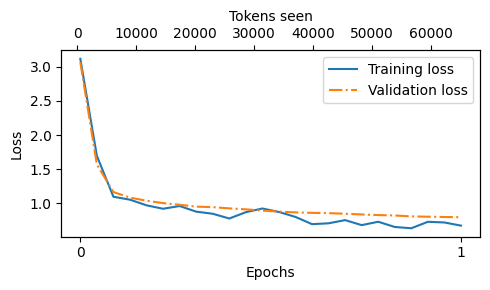

In [348]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

## STEP 6: EXTRACTING AND SAVING RESPONSES

In [ ]:
torch.manual_seed(123)


for entry in test_data[:3]:

    input_text = format_input(entry)

    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = (
        generated_text[len(input_text):]
        .replace("### Response:", "")
        .strip()
)

    print(input_text)
    print(f"\nCorrect response:\n>> {entry['output']}")
    print(f"\nModel response:\n>> {response_text.strip()}")
    print("-------------------------------------")
    
    
# the quality of responses are not good and needs improvements by imcreasing their eppochs.....

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Rewrite the sentence using a simile.

### Input:
The car is very fast.

Correct response:
>> The car is as fast as lightning.

Model response:
>> The car is very fast.
-------------------------------------
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What type of cloud is typically associated with thunderstorms?

Correct response:
>> The type of cloud typically associated with thunderstorms is cumulonimbus.

Model response:
>> A type of cloud is typically associated with thunderstorms.
-------------------------------------
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Name the author of 'Pride and Prejudice'.

Correct response:
>> Jane Austen.

Model response:
>> The author of 'Pride and Prejudice' is Robert F

In [ ]:
from tqdm import tqdm

for i, entry in tqdm(enumerate(test_data), total=len(test_data)):

    input_text = format_input(entry)

    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )
    generated_text = token_ids_to_text(token_ids, tokenizer)
    response_text = generated_text[len(input_text):].replace("### Response:", "").strip()

    test_data[i]["model_response"] = response_text


with open("instruction-data-with-response.json", "w") as file:
    json.dump(test_data, file, indent=4)  # "indent" for pretty-printing
    
    
# we need this 10% test data without responses so that we can test our model on this test data .....

100%|██████████| 110/110 [01:45<00:00,  1.04it/s]


In [351]:
print(test_data[0])

{'instruction': 'Rewrite the sentence using a simile.', 'input': 'The car is very fast.', 'output': 'The car is as fast as lightning.', 'model_response': 'The car is very fast.'}


# SAVE MODEL

In [ ]:
# import re


# file_name = f"{re.sub(r'[ ()]', '', CHOOSE_MODEL) }-sft.pth"
# torch.save(model.state_dict(), file_name)
# print(f"Model saved as {file_name}")

# Load model via
# model.load_state_dict(torch.load("gpt2-medium355M-sft.pth"))

In [359]:
import torch

# Save checkpoint
checkpoint = {
    'model_state_dict': model.state_dict(),     # Model's weights
    'optimizer_state_dict': optimizer.state_dict(),  # Optimizer's state
    'epoch': num_epochs,                     # Last saved epoch
    'train_loss': train_loss,
    'validation_loss': val_loss                          # Any additional info,
    # Any additional info,
    
}

torch.save(checkpoint, 'LLM/MyLLM/LLM_v1_chatbot_with_optim_params.pth')


# LOAD MODEL PARAMS

In [360]:
# Load checkpoint
checkpoint = torch.load('LLM/MyLLM/LLM_v1_chatbot_with_optim_params.pth')

# Verify saved data
print(checkpoint.keys())                # Should include 'model_state_dict', 'optimizer_state_dict', etc.
print("Epoch:", checkpoint['epoch'])    # Display saved epoch
print("Train Loss:", checkpoint['train_loss'])
print("Validation Loss:", checkpoint['validation_loss'])


dict_keys(['model_state_dict', 'optimizer_state_dict', 'epoch', 'train_loss', 'validation_loss'])
Epoch: 1
Train Loss: 0.6436726212501526
Validation Loss: 0.795734977722168


In [361]:
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
model.to(device)  # Ensure model is moved to the correct device

# Continue training from the saved epoch
start_epoch = checkpoint['epoch']


## STEP 7: EVALUATING THE FINE-TUNED LLM

In [1]:
# we can use it if we want but now its end......


In [353]:
import psutil

def check_if_running(process_name):
    running = False
    for proc in psutil.process_iter(["name"]):
        if process_name in proc.info["name"]:
            running = True
            break
    return running

ollama_running = check_if_running("ollama")

if not ollama_running:
    raise RuntimeError("Ollama not running. Launch ollama before proceeding.")
print("Ollama running:", check_if_running("ollama"))

RuntimeError: Ollama not running. Launch ollama before proceeding.

In [ ]:
import urllib.request

def query_model(
    prompt,
    model="llama3",
    url="http://localhost:11434/api/chat"
):
    # Create the data payload as a dictionary
    data = {
        "model": model,
        "messages": [
            {"role": "user", "content": prompt}
        ],
        "options": {     # Settings below are required for deterministic responses
            "seed": 123,
            "temperature": 0,
            "num_ctx": 2048
        }
    }


    # Convert the dictionary to a JSON formatted string and encode it to bytes
    payload = json.dumps(data).encode("utf-8")

    # Create a request object, setting the method to POST and adding necessary headers
    request = urllib.request.Request(
        url,
        data=payload,
        method="POST"
    )
    request.add_header("Content-Type", "application/json")

    # Send the request and capture the response
    response_data = ""
    with urllib.request.urlopen(request) as response:
        # Read and decode the response
        while True:
            line = response.readline().decode("utf-8")
            if not line:
                break
            response_json = json.loads(line)
            response_data += response_json["message"]["content"]

    return response_data

In [ ]:

model = "llama3"
result = query_model("What do Llamas eat?", model)
print(result)

In [354]:
for entry in test_data[:3]:
    prompt = (
        f"Given the input `{format_input(entry)}` "
        f"and correct output `{entry['output']}`, "
        f"score the model response `{entry['model_response']}`"
        f" on a scale from 0 to 100, where 100 is the best score. "
    )
    print("\nDataset response:")
    print(">>", entry['output'])
    print("\nModel response:")
    print(">>", entry["model_response"])
    print("\nScore:")
    print(">>", query_model(prompt))
    print("\n-------------------------")


Dataset response:
>> The car is as fast as lightning.

Model response:
>> The car is very fast.

Score:


NameError: name 'query_model' is not defined

In [ ]:
for entry in test_data[:2]:
    prompt = (
            f"Given the input `{format_input(entry)}` "
            f"and correct output `{entry['output']}`, "
            f"score the model response `{entry['model_response']}`"
            f" on a scale from 0 to 100, where 100 is the best score. "
            f"Respond with the integer number only."
        )
    score = query_model(prompt, model)
    print("\nDataset response:")
    print(">>", entry['output'])
    print("\nModel response:")
    print(">>", entry["model_response"])
    print("\nScore:")
    print(">>", query_model(prompt, model))
    print("\n-------------------------")

In [ ]:
def generate_model_scores(json_data, json_key, model="llama3"):
    scores = []
    for entry in tqdm(json_data, desc="Scoring entries"):
        prompt = (
            f"Given the input `{format_input(entry)}` "
            f"and correct output `{entry['output']}`, "
            f"score the model response `{entry[json_key]}`"
            f" on a scale from 0 to 100, where 100 is the best score. "
            f"Respond with the integer number only."
        )
        score = query_model(prompt, model)
        try:
            scores.append(int(score))
        except ValueError:
            print(f"Could not convert score: {score}")
            continue

    return scores